Descrição do problema: Temos um dataset com informações sobre diversos tipos de panelas vendidas em uma webcomerce. Queremos utilizar os dados para construir features capazes de prever a intenção de compra dos clientes. Primeiramente importamos as bibliotecas que vamos precisar.

In [88]:
import pandas as pd
import re
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Carregamos o dataset e verificamos os títulos das colunas

In [56]:
df = pd.read_csv("problem1_dataset.csv")
print(df.columns)

Index(['ITEM_ID', 'ALTURA', 'CAPACIDADE_(L)', 'COMPOSICAO', 'COR', 'FORMATO',
       'LARGURA', 'MARCA', 'PARA_LAVA_LOUCAS', 'PARA_MICRO_ONDAS', 'PESO',
       'PROFUNDIDADE', 'TEMPO_GARANTIA', 'TEM_FERRO_FUNDIDO', 'TEM_GRELHA',
       'TEM_TAMPA', 'TIPO_PRODUTO', 'TIPO_WOK', 'SESSION_ID', 'ITEM_PRICE',
       'INTERESTED'],
      dtype='object')


Uma descrição dos dados é um procedimento padrão nesta altura do tratamento dos mesmos.

In [33]:
df.describe(include='all')

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
count,1.802750e+05,171007.000000,76671.000000,156978,170251,90011,171007.000000,180001,104086,86402,...,171007.000000,122770.000000,180275,180275,180275.000000,180275,180275,178273.000000,167178.000000,180275.000000
unique,NaN,NaN,NaN,5,24,5,NaN,35,3,2,...,NaN,NaN,2,2,NaN,38,2,NaN,NaN,NaN
top,NaN,NaN,NaN,ALUMINIO,INOX,REDONDO,NaN,TRAMONTINA,Yes,no,...,NaN,NaN,NAO,NAO,NaN,PANELA,NAO,NaN,NaN,NaN
freq,NaN,NaN,NaN,114218,34502,79888,NaN,72971,74615,81367,...,NaN,NaN,154938,160090,NaN,62418,144820,NaN,NaN,NaN
mean,2.156229e+08,30.575636,4.234668,NaN,NaN,NaN,27.882157,NaN,NaN,NaN,...,34.797386,13.870742,NaN,NaN,0.440704,NaN,NaN,499.757195,127.831019,0.086130
std,1.030257e+08,14.856403,1.699274,NaN,NaN,NaN,10.494943,NaN,NaN,NaN,...,15.179911,43.641581,NaN,NaN,0.496473,NaN,NaN,288.841689,137.298241,0.280556
min,2.939160e+05,2.000000,0.045000,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,...,2.500000,1.000000,NaN,NaN,0.000000,NaN,NaN,1.011194,0.550000,0.000000
25%,2.273688e+08,19.000000,3.100000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,...,19.800000,3.000000,NaN,NaN,0.000000,NaN,NaN,249.343773,74.990000,0.000000
50%,2.485863e+08,30.500000,4.500000,NaN,NaN,NaN,27.800000,NaN,NaN,NaN,...,38.500000,6.000000,NaN,NaN,0.000000,NaN,NaN,500.759182,104.482418,0.000000
75%,2.567376e+08,42.700000,6.000000,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,...,47.000000,12.000000,NaN,NaN,1.000000,NaN,NaN,749.204738,146.327727,0.000000


Agora vamos visualizar os registros únicos de cada uma das colunas que nos iteressam

In [34]:
print(df['PARA_LAVA_LOUCAS'].unique())
print(df['COMPOSICAO'].unique())
print(df['COR'].unique())
print(df['FORMATO'].unique())
print(df['MARCA'].unique())
print(df['PARA_MICRO_ONDAS'].unique())
print(df['TEM_FERRO_FUNDIDO'].unique())
print(df['TEM_GRELHA'].unique())
print(df['TEM_TAMPA'].unique())
print(df['TIPO_PRODUTO'].unique())
print(df['TIPO_WOK'].unique())
print(df['INTERESTED'].unique())

[nan 'No' 'Yes' 'NAO']
['ALUMINIO' 'INOX' nan 'CERAMICA' 'PORCELANA' 'ACO ESMALTADO']
['VINHO' 'COLORIDO' 'INOX' 'VERMELHO' 'AMARELO' 'LARANJA' 'CEREJA' 'PRETO'
 'GRAFITE' nan 'ROXO' 'TURQUESA' 'PRATA' 'GOIABA' 'BERINGELA' 'AZUL'
 'MARROM' 'VERDE' 'COBRE' 'CHOCOLATE' 'FENDI' 'BRANCO' 'ROSA' 'ACACIA'
 'CINZA']
[nan 'REDONDO' 'FRIGIDEIRA' 'OVAL' 'QUADRADO' 'RETANGULAR']
['LA CUISINE' 'TRAMONTINA' 'EURO' 'PANELA MINEIRA' 'FUMIL' 'CERAFLAME'
 'EURO HOME' 'VEC' 'BRINOX' 'ALUMINIO FORTALEZA' 'MTA' 'HAPPYCALL'
 'HERCULES' 'SUN GUIDER' 'ROCHEDO' 'ELECTROLUX' 'PANELUX' 'DONA CHEFA'
 'ALUMINIO RAMOS' 'TRAMONTINA DESIGN COLLECTION' 'MIMO STYLE' 'PRAVA' nan
 'AT.HOME' 'JOMAFE' 'OXFORD COOKWARE' 'PRAVAS' 'FORMA' 'BIALETTI'
 'BR HOME' 'ZANELLA' 'CLASSIC HOME' 'DYNASTY' 'MERIDIONAL' 'CONSUL'
 'HELIOS']
[nan 'no' 'yes']
['NAO' 'SIM']
['SIM' 'NAO']
[1. 0.]
['PANELA' 'PIPOQUEIRA' 'ESPAGUETEIRA' 'CREMEIRA' 'WOK' 'CACAROLA'
 'CUSCUZEIRA' 'CHAPA' 'CHALEIRA' 'FRIGIDEIRA' 'FERVEDOR' 'SANDUICHEIRA'
 'FONDUE' 

Algumas delas contém variáveis que são do tipo categórica, porém em formato object. Vamos torná-las todas em tipo category. Também temos uma falta de padronização em algumas variáveis que deveriam ser booleanas, como por exemplo PARA_LAVA_LOUCAS ou TEM_GRELHA. Vou usar expressões regulares para tornar tudo 0 ou 1.

Vou assumir que se não há informações para alguns campos, como PARA_LAVA_LOUCAS, PARA_MICRO_ONDAS, TEM_GRELHA, etc, é por que a resposta é não.

In [57]:
for i in ['PARA_LAVA_LOUCAS', 'PARA_MICRO_ONDAS','TEM_FERRO_FUNDIDO', 'TEM_GRELHA', 'TEM_TAMPA', 'TIPO_WOK']:
    df[i].fillna('0', inplace=True)
for i in ['PARA_LAVA_LOUCAS', 'PARA_MICRO_ONDAS','TEM_FERRO_FUNDIDO', 'TEM_GRELHA', 'TIPO_WOK']:
    df[i] = df[i].str.replace(r'No|NAO|no', '0')
    df[i] = df[i].str.replace(r'Yes|yes|SIM', '1')

# tornar os dados do tipo category
df['PARA_LAVA_LOUCAS'] = df['PARA_LAVA_LOUCAS'].astype('category')
df['PARA_MICRO_ONDAS'] = df['PARA_MICRO_ONDAS'].astype('category')
df['TEM_FERRO_FUNDIDO'] = df['TEM_FERRO_FUNDIDO'].astype('category')
df['TEM_GRELHA'] = df['TEM_GRELHA'].astype('category')
df['TEM_TAMPA'] = df['TEM_TAMPA'].astype('category')
df['TIPO_WOK'] = df['TIPO_WOK'].astype('category')
df['COMPOSICAO'] = df['COMPOSICAO'].astype('category')
df['COR'] =  df['COR'].astype('category')
df['FORMATO'] = df['FORMATO'].astype('category')
df['MARCA'] = df['MARCA'].astype('category')
df['TIPO_PRODUTO'] = df['TIPO_PRODUTO'].astype('category')
df['INTERESTED'] = df['INTERESTED'].astype('category')

Verificando se não esquecemos de nenhuma coluna...

In [36]:
df.dtypes

ITEM_ID                 int64
ALTURA                float64
CAPACIDADE_(L)        float64
COMPOSICAO           category
COR                  category
FORMATO              category
LARGURA               float64
MARCA                category
PARA_LAVA_LOUCAS     category
PARA_MICRO_ONDAS     category
PESO                  float64
PROFUNDIDADE          float64
TEMPO_GARANTIA        float64
TEM_FERRO_FUNDIDO    category
TEM_GRELHA           category
TEM_TAMPA            category
TIPO_PRODUTO         category
TIPO_WOK             category
SESSION_ID            float64
ITEM_PRICE            float64
INTERESTED           category
dtype: object

Verificar quantos e onde estão os valores faltantes (NaNs)

In [37]:
df.isna().sum()/len(df)

ITEM_ID              0.000000
ALTURA               0.051410
CAPACIDADE_(L)       0.574700
COMPOSICAO           0.129230
COR                  0.055604
FORMATO              0.500702
LARGURA              0.051410
MARCA                0.001520
PARA_LAVA_LOUCAS     0.000000
PARA_MICRO_ONDAS     0.000000
PESO                 0.453479
PROFUNDIDADE         0.051410
TEMPO_GARANTIA       0.318985
TEM_FERRO_FUNDIDO    0.000000
TEM_GRELHA           0.000000
TEM_TAMPA            0.000000
TIPO_PRODUTO         0.000000
TIPO_WOK             0.000000
SESSION_ID           0.011105
ITEM_PRICE           0.072650
INTERESTED           0.000000
dtype: float64

As variaveis ITEM_ID e SESSION_ID não trazem nenhuma informação relevante, vou descarta-las.

In [58]:
df.drop(['ITEM_ID', 'SESSION_ID'], axis=1, inplace=True)

Agora vamos explorar visualmente as variáveis numéricas através de uma scatter-plot. Isso ajuda pois podemos ver qualitativamente se há correlação entre as variáveis e seus histogramas na diagonal.

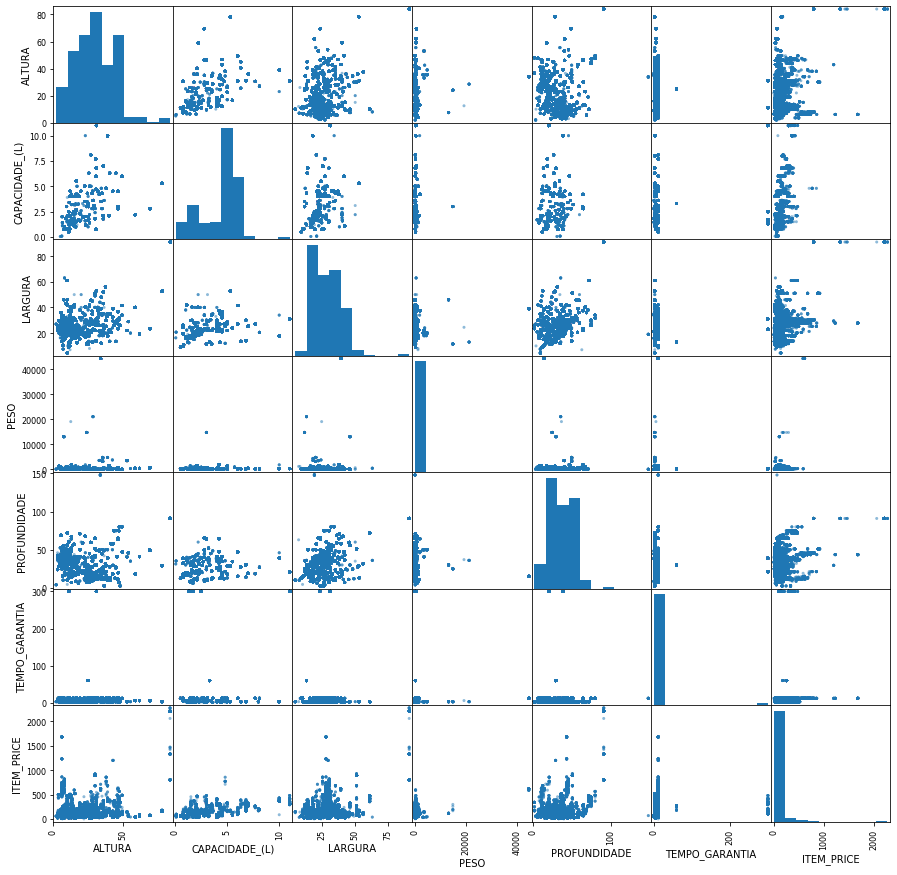

In [39]:
scatter_matrix(df.drop(['TEM_TAMPA', 'INTERESTED'], axis=1), figsize=(15,15))
plt.show()

Podemos ver que existe algum tipo de correlação entre CAPACIDADE e ITEM_PRICE. Também é notável que as distribuições de TEMPO_GARANTIA e ITEM_PRICE apresentam algum outlier. Talvez seja algum tipo de panela especial que deve ser de alta durabilidade? Alguma aplicação industrial?

Verificar as variáveis geométricas ALTURA, LARGURA, PROFUNDIDADE, CAPACIDADE e PESO através de um gráfico tipo violinplot, onde podemos verificar sua distribuição por fabricante e ter uma estimativa da densidade. Os fabricantes faltantes significam que temos NaNs neste subconjunto específico.

/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


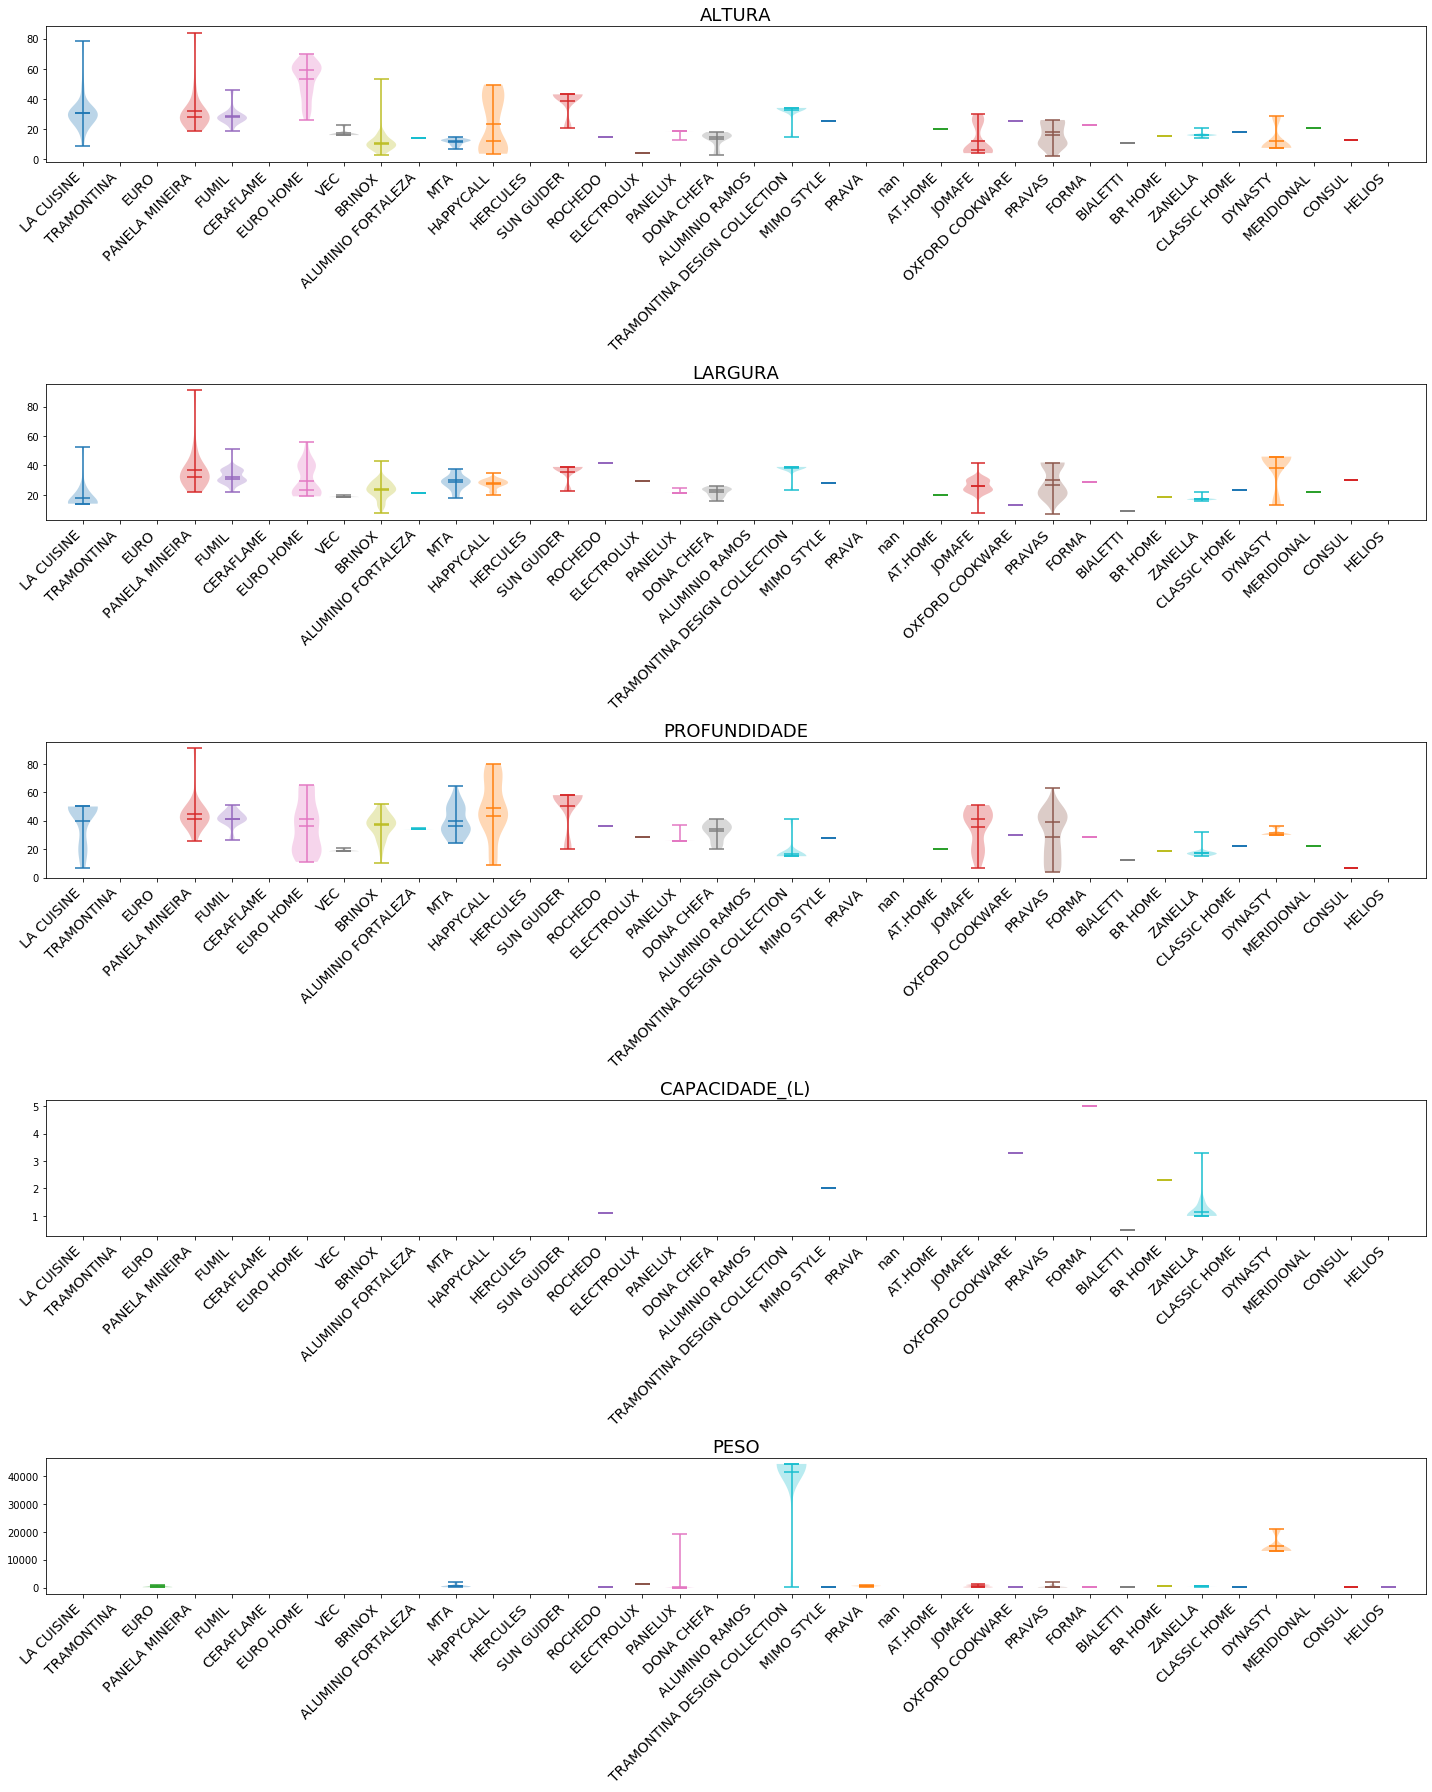

In [40]:
# vou fazer o mesmo conjunto de violin plots varias vezes, então defini esta função 
def show_my_violins(paineis, ticks):
    tc = df[ticks].unique()
    
    fig, ax = plt.subplots(figsize=(20,5*len(paineis)), nrows=len(paineis), ncols=1)

    for i, k in enumerate(paineis):

        data = [df.loc[df[ticks] == j][k] for j in tc]

        for j, l in enumerate(data):
            try:
                ax[i].violinplot(l, [j], points=100, widths=0.8,
                          showmeans=True, showextrema=True, showmedians=True, bw_method=0.5)
            except:
                continue
        ax[i].set_title(k, fontsize=18)
        ax[i].set_xticks(np.arange(len(tc)))

        ax[i].set_xticklabels(labels=tc, rotation=45,ha='right', size=14)
        ax[i].set_xlim(-1, len(tc))
        plt.tight_layout()

    plt.show()    

show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE', 'CAPACIDADE_(L)', 'PESO'], 'MARCA')

Podemos ver que alguns registros estão faltando, logo seus gráficos não são exibidos. Também vemos que existem produtos que não sabemos qual é o fabricante!

Fazemos a mesma análise por gráfico de violin plot porém agora classificando por tipo de produto.

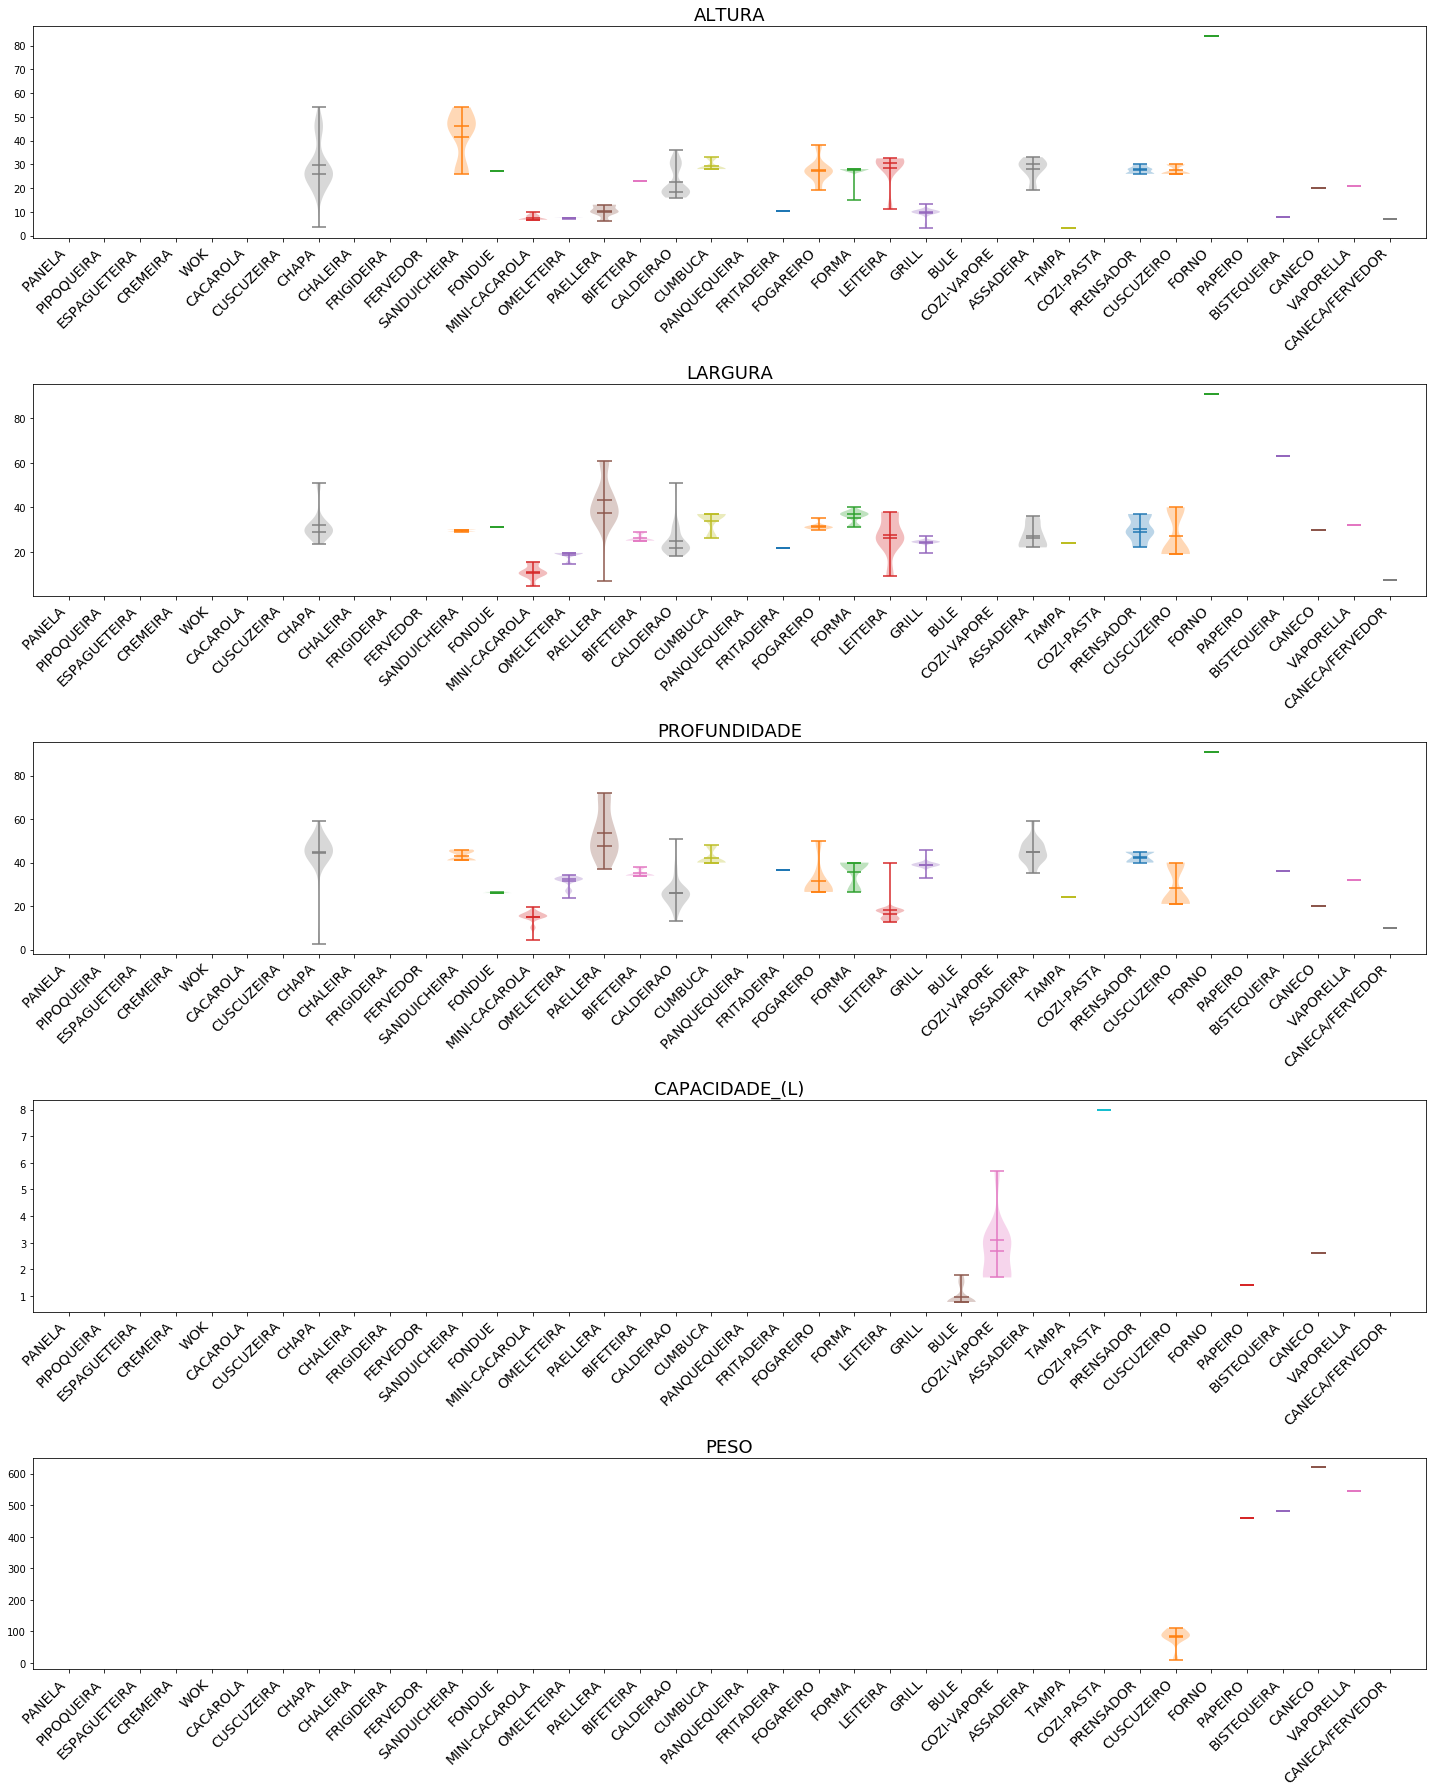

In [41]:
show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE', 'CAPACIDADE_(L)', 'PESO'], 'TIPO_PRODUTO')

Podemos ver que diversos tipos de produtos apresentam valores faltantes, pois seus gráficos simplesmente não são exibidos. No entanto, uma boa notícia: todos os produtos apresentam informação sobre que tipo são!

Vamos imputar as medianas para os valores faltantes. No entanto vamos fazer isso agrupando por MARCA e TIPO_PRODUTO, ou seja: nossa hipótese é que cada tipo de produto feito por um certo fabricante deve seguir um certo padrão.

In [59]:
medidas = ['ALTURA', 'LARGURA', 'PROFUNDIDADE']

for m in medidas:
    medians = df.groupby(['MARCA', 'TIPO_PRODUTO'])[m].median()
#     print(medians)
#     df_test = df.copy()
    print('NaN em {:s} antes: \t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

    for i in df[df[m].isna()].index:
        # Preciso desse bloco de try ... except pois se um dos grupos contiver apenas NaN obtenho erro
        try:
            df.loc[i, m] = medians[df.loc[i, 'MARCA']][df.loc[i, 'TIPO_PRODUTO']]
        except:
            continue

    print('NaN em {:s} depois:\t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))


NaN em ALTURA antes: 	9268	(5.14%)
NaN em ALTURA depois:	1132	(0.63%)
NaN em LARGURA antes: 	9268	(5.14%)
NaN em LARGURA depois:	1132	(0.63%)
NaN em PROFUNDIDADE antes: 	9268	(5.14%)
NaN em PROFUNDIDADE depois:	1132	(0.63%)


Vamos verificar o resultado com os violin plots

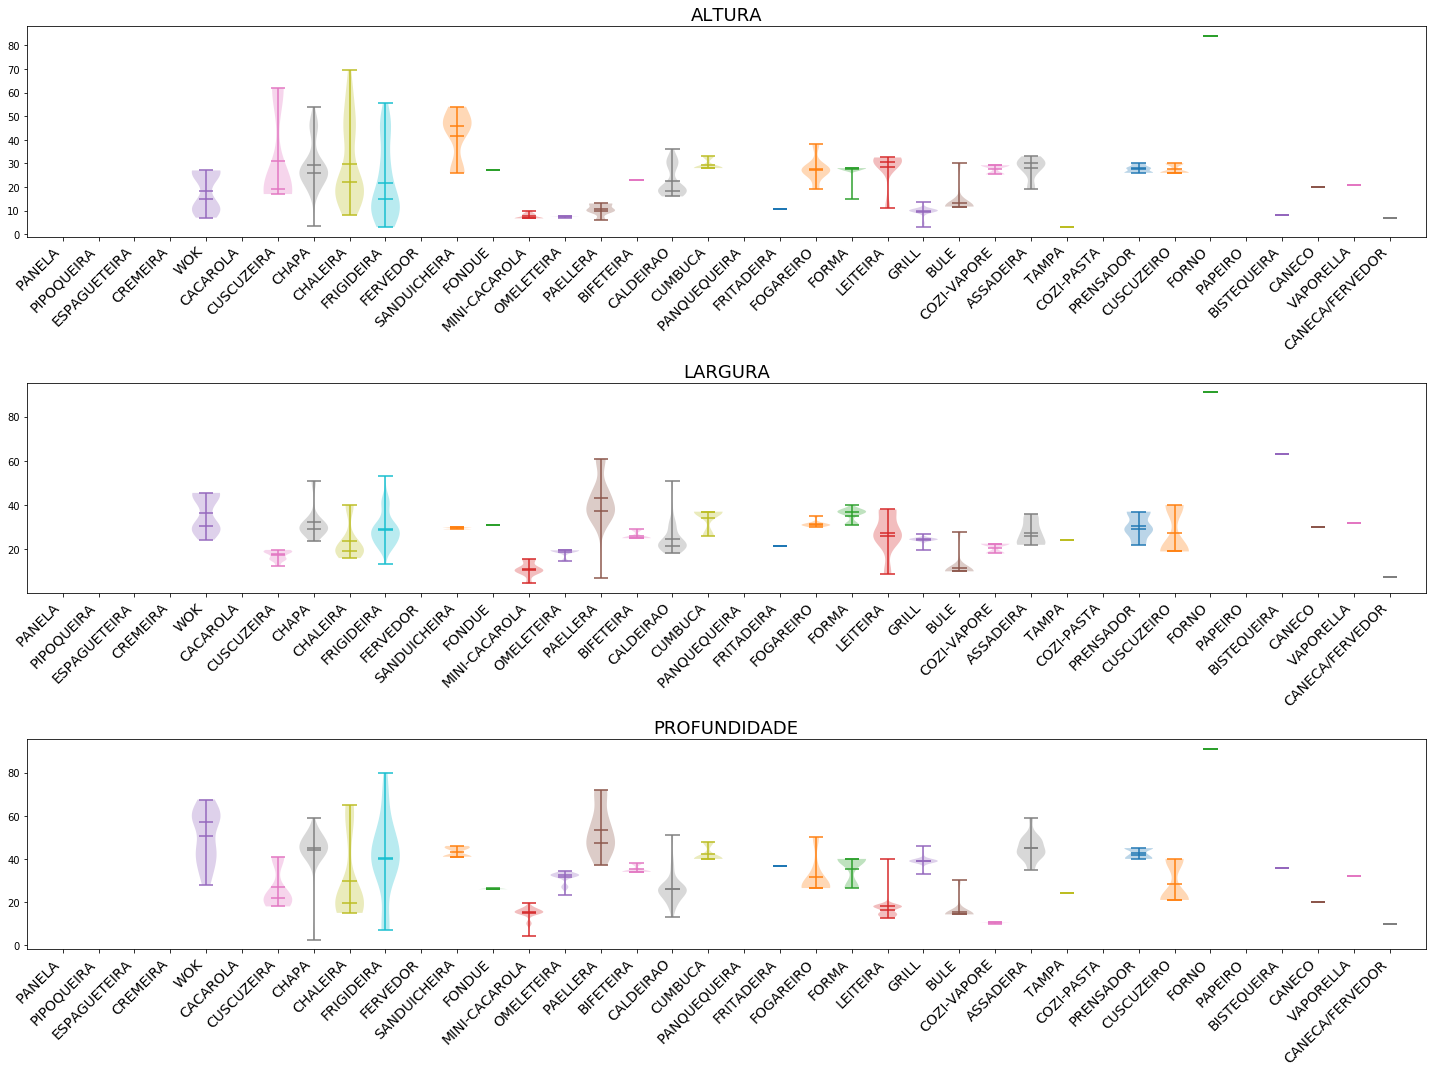

In [43]:
show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE'], 'TIPO_PRODUTO')

Vemos que alguns tipos de produtos agora estão com seus conjuntos de dados completos. Agora imputamos as medianas apenas por tipo de produto

In [60]:
for m in medidas:
    medians = df.groupby('TIPO_PRODUTO')[m].median()
    print('NaN em {:s} antes: \t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

    for i in df[df[m].isna()].index:
        try:
            df.loc[i, m] = medians[df.loc[i, 'TIPO_PRODUTO']]
        except:
            continue

    print('NaN em {:s} depois:\t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))



NaN em ALTURA antes: 	1132	(0.63%)
NaN em ALTURA depois:	405	(0.22%)
NaN em LARGURA antes: 	1132	(0.63%)
NaN em LARGURA depois:	405	(0.22%)
NaN em PROFUNDIDADE antes: 	1132	(0.63%)
NaN em PROFUNDIDADE depois:	405	(0.22%)


Verificar o resultado com os violin plots

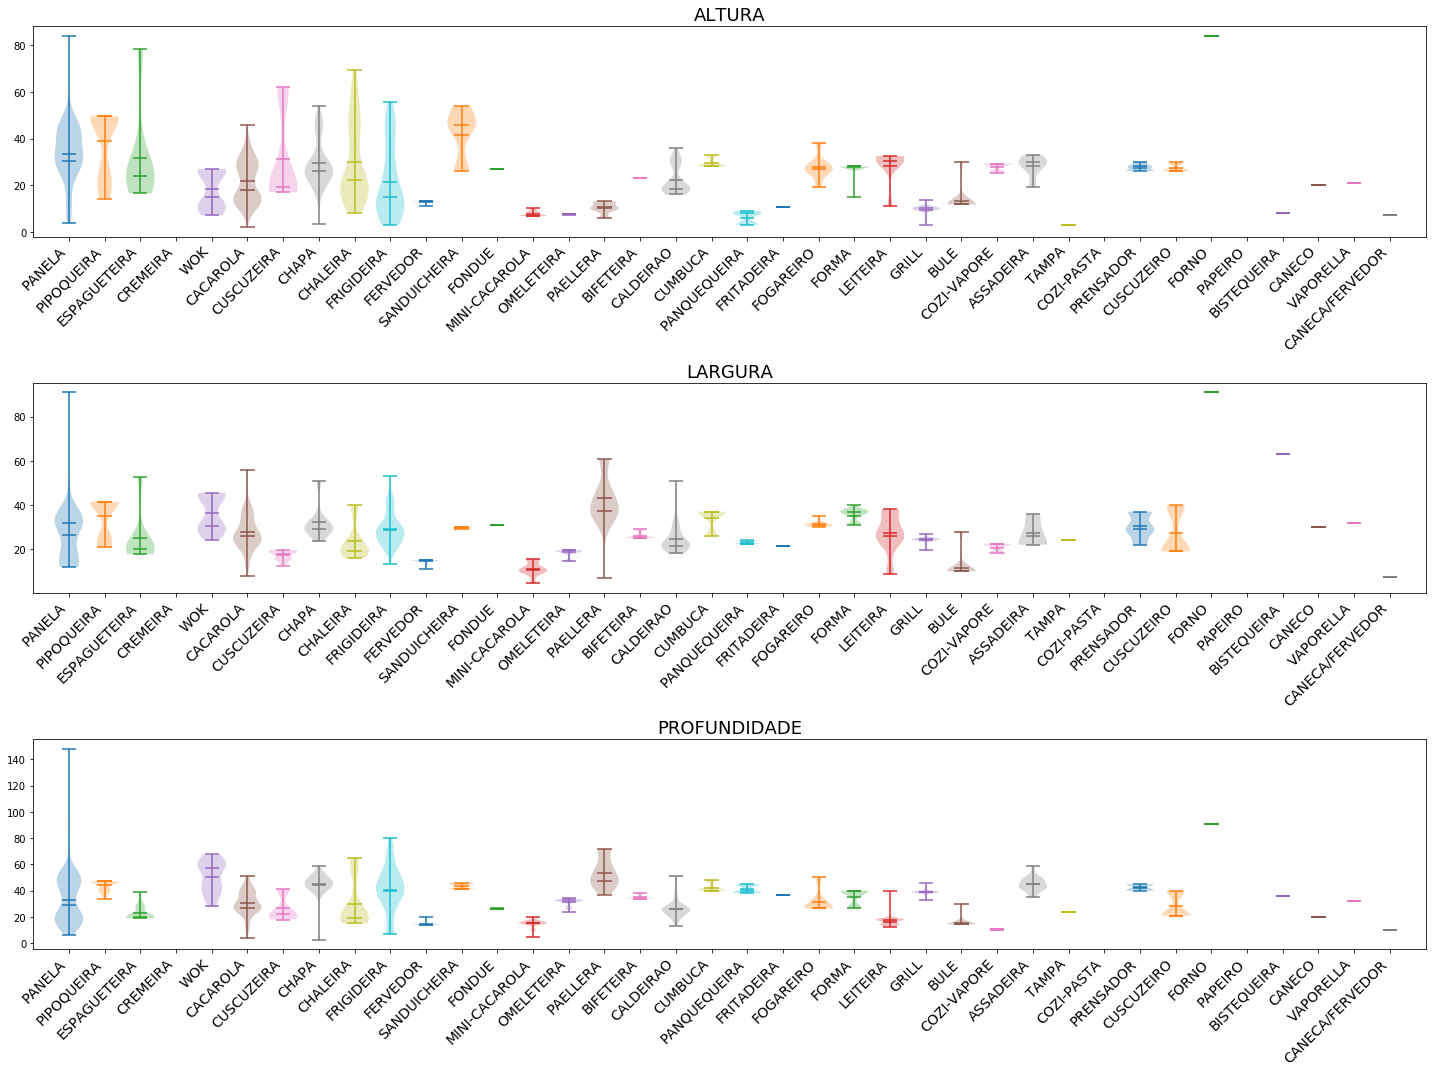

In [45]:
show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE'], 'TIPO_PRODUTO')

Apenas a CREMEIRA, COZI-PASTA e o PAPEIRO não estão completos, provavelmente por serem produtos um pouco mais exóticos. Por fim, imputamos as medianas gerais para os tipos de produtos que ainda contém NaN (CREMEIRA,COZI-PASTA e PAPEIRO)

In [61]:
for m in medidas:
    median = df[m].median()

    print('NaN em {:s} antes: \t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

    for i in df[df[m].isna()].index:
        try:
            df.loc[i, m] = median
        except:
            continue

    print('NaN em {:s} depois:\t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))


NaN em ALTURA antes: 	405	(0.22%)
NaN em ALTURA depois:	0	(0.00%)
NaN em LARGURA antes: 	405	(0.22%)
NaN em LARGURA depois:	0	(0.00%)
NaN em PROFUNDIDADE antes: 	405	(0.22%)
NaN em PROFUNDIDADE depois:	0	(0.00%)


Agora sabemos que não há mais NaNs nessas variáveis geométricas. Verificando o resultado final

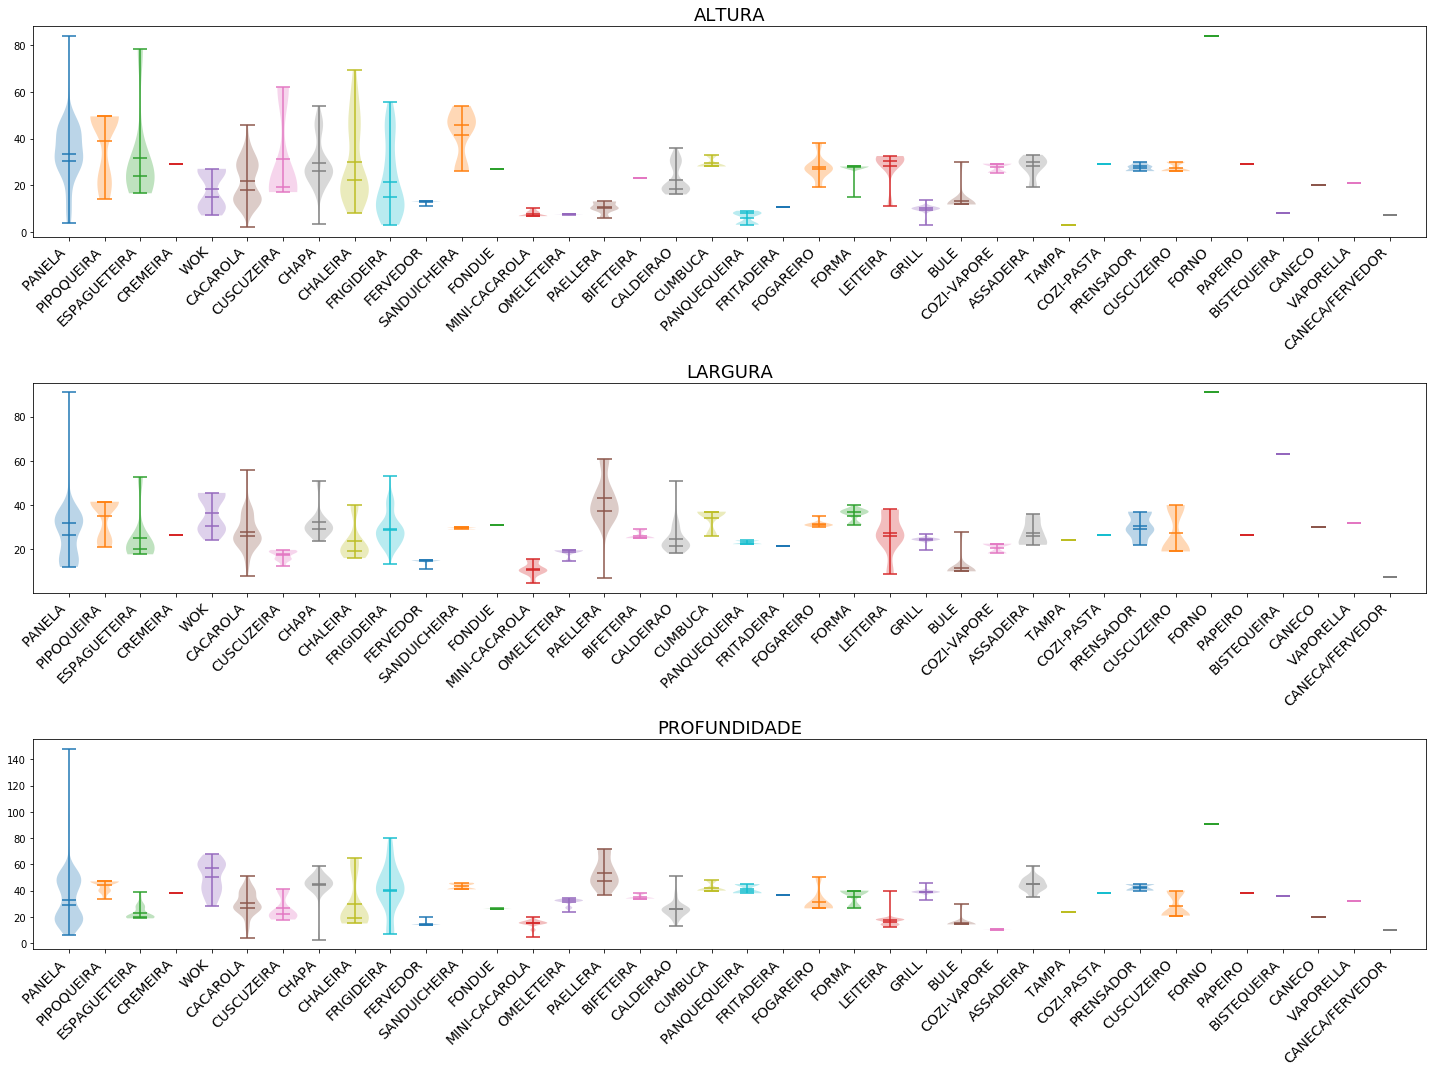

In [47]:
show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE'], 'TIPO_PRODUTO')

Um último detalhe sobre estas medidas: para alguns tipos de produto, tais como PANELA e ESPAGUETEIRA, temos valores bem altos. Talvez seja hora de simplesmente remover estes outliers. Pensando bem, o meu argumento de que pode ser alguma aplicação industrial é um pouco infundado. Imagino que esse tipo de aquisição não é o foco de um site de webcomerce B2C. 

Vou simplesmente jogar fora todo mundo que estiver a mais de 3 desvios padrão da média para todo estas 3 grandezas.

In [62]:
df = df[(np.abs(stats.zscore(df[['ALTURA', 'LARGURA', 'PROFUNDIDADE']])) < 3).all(axis=1)]

Finalmente, verificando os resultados

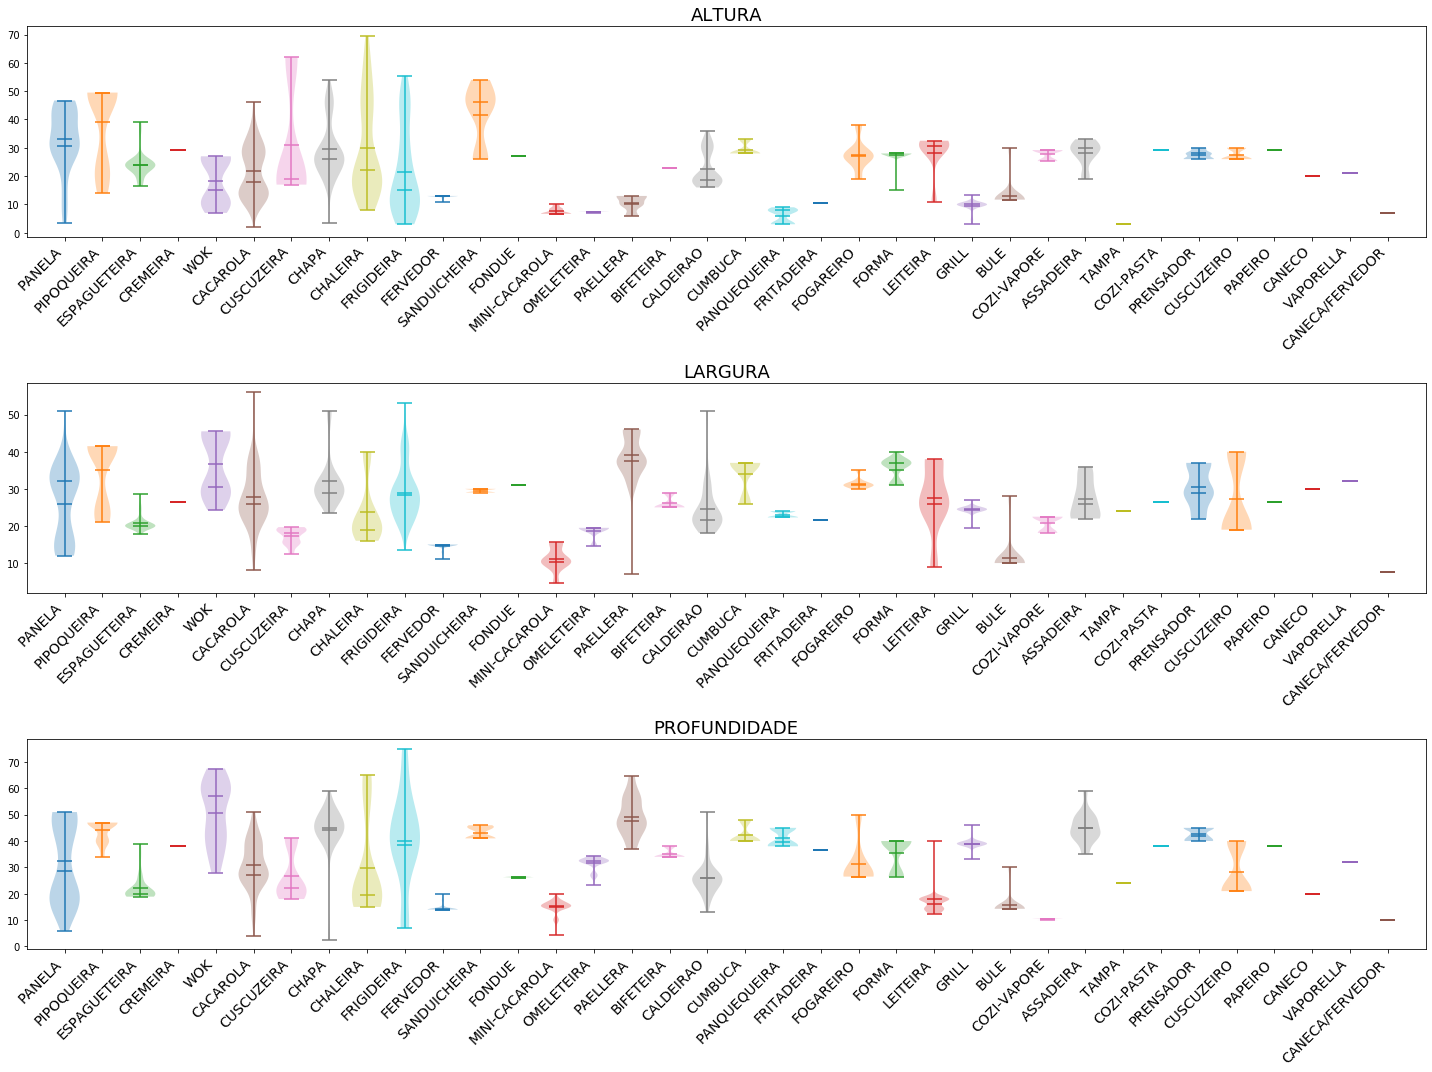

In [63]:
show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE'], 'TIPO_PRODUTO')

Agora parece que temos valores realistas para estas três unidades.

Vamos usar uma estimativa grosseira para a CAPACIDADE como ALTURA * LARGURA * PROFUNDIDADE

In [64]:
m = 'CAPACIDADE_(L)'
print('NaN em {:s} antes: \t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

for i in df[df[m].isna()].index:
    df.loc[i, m] = df.loc[i, 'ALTURA'] * df.loc[i, 'LARGURA'] * df.loc[i, 'PROFUNDIDADE'] / 1000
print('NaN em {:s} depois:\t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

NaN em CAPACIDADE_(L) antes: 	102705	(57.62%)
NaN em CAPACIDADE_(L) depois:	0	(0.00%)


Última verificação para estas variáveis numéricas.

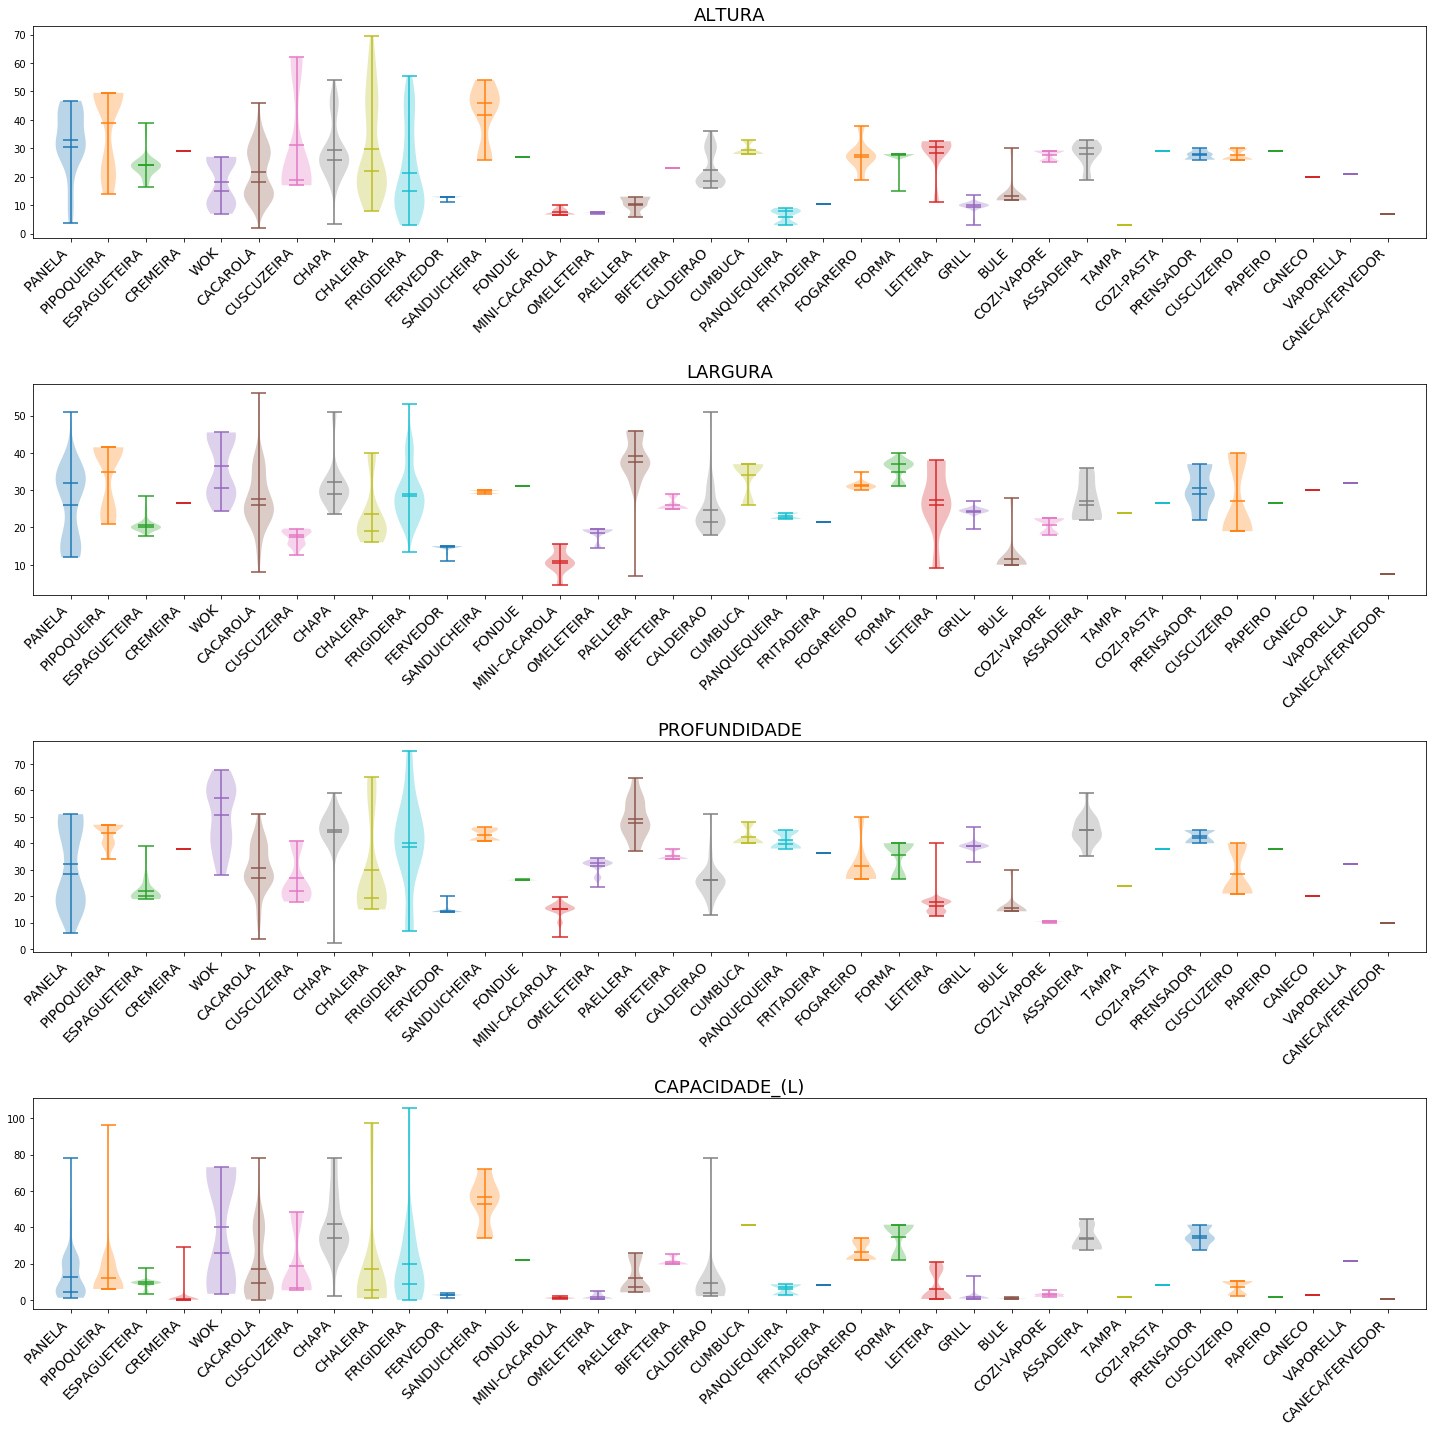

In [51]:
show_my_violins(['ALTURA', 'LARGURA', 'PROFUNDIDADE', 'CAPACIDADE_(L)'], 'TIPO_PRODUTO')

Temos um ou mais registros com uma capacidade grande, cerca de 100L. Imagino que possa existir algum problema com as unidades de medida de ALTURA, PROFUNDIDADE e LARGURA. De qualquer modo, vamos seguir em frente pois estamos superestimando a CAPACIDADE de maneira igual para quase 60% do conjunto. É um erro quase que sistemático. Vamos usar K-Nearest Neighbors para determinar as variáveis categóricas faltantes

In [52]:
print(df.isna().sum())

ALTURA                   0
CAPACIDADE_(L)           0
COMPOSICAO           22654
COR                   9872
FORMATO              90089
LARGURA                  0
MARCA                  274
PARA_LAVA_LOUCAS         0
PARA_MICRO_ONDAS         0
PESO                 79745
PROFUNDIDADE             0
TEMPO_GARANTIA       56856
TEM_FERRO_FUNDIDO        0
TEM_GRELHA               0
TEM_TAMPA                0
TIPO_PRODUTO             0
TIPO_WOK                 0
ITEM_PRICE           12797
INTERESTED               0
dtype: int64


Primeiro o FORMATO vai ser classificado de acordo com variáveis que de certa forma determinam o formato do objeto: ALTURA, LARGURA, PROFUNDIDADE e CAPACIDADE. Também vamos tornar a variável categórica TIPO_PRODUTO em uma variável do tipo dummy, para que ela possa ser utilizada na classificação.

In [65]:
# recebe a feature que queremos imputar os NaNs e o descritor para a calcular as distancias no kNN
def impute_cat_feature(feature, desc):
    print(df[feature].unique())
    print('NaN em {:s} antes: \t{:d}\t({:4.2f}%)'.format(feature, df[feature].isna().sum(), 100 * df[feature].isna().sum() / len(df)))
    
    # descritores em X e labels em y
    X = df.loc[df[feature].notnull()][desc]
    y = df.loc[df[feature].notnull()][feature]

    # vamos prever os labels deste conjunto
    X_pred = df.loc[df[feature].isna()][desc] #.drop('FORMATO', axis=1)

    # treinamento do classificador
    nbrs = KNeighborsClassifier(n_neighbors=3).fit(X,y)

    # predição das labels
    y_pred = nbrs.predict(X_pred)

    # as labels são levadas de volta ao dataframe original, substituindo os NaNs
    for i, j in enumerate(X_pred.index):
        df.loc[j, feature] = y_pred[i]

    print(df[feature].unique())
    print('NaN em {:s} depois: \t{:d}\t({:4.2f}%)'.format(feature, df[feature].isna().sum(), 100 * df[feature].isna().sum() / len(df)))

# transforma TIPO_PRODUTO em dummy
df = pd.get_dummies(df, columns=['TIPO_PRODUTO']) #.drop(['INTERESTED'], axis=1)

# descritor para o k-NN
desc = ['ALTURA', 'CAPACIDADE_(L)', 'LARGURA', 'PROFUNDIDADE'] + [t for t in df.columns if 'TIPO_PRODUTO' in t]

# chama o imputador
impute_cat_feature('FORMATO', desc)

[NaN, REDONDO, FRIGIDEIRA, OVAL, QUADRADO, RETANGULAR]
Categories (5, object): [REDONDO, FRIGIDEIRA, OVAL, QUADRADO, RETANGULAR]
NaN em FORMATO antes: 	90089	(50.54%)
[REDONDO, FRIGIDEIRA, RETANGULAR, OVAL, QUADRADO]
Categories (5, object): [REDONDO, FRIGIDEIRA, RETANGULAR, OVAL, QUADRADO]
NaN em FORMATO depois: 	0	(0.00%)


Mesmo procedimento é feito para a variável MARCA, porém agora vamos transformar FORMATO também em uma variável do tipo dummy, de modo que a mesma possa ser utilizada na classificação.

In [66]:
# transforma FORMATO em dummy
df = pd.get_dummies(df, columns=['FORMATO']) #.drop(['INTERESTED'], axis=1)

# expande o numero de colunas no descritor
desc += [t for t in df.columns if 'FORMATO' in t]

impute_cat_feature('MARCA', desc)

[LA CUISINE, TRAMONTINA, EURO, PANELA MINEIRA, FUMIL, ..., CLASSIC HOME, DYNASTY, MERIDIONAL, CONSUL, HELIOS]
Length: 36
Categories (35, object): [LA CUISINE, TRAMONTINA, EURO, PANELA MINEIRA, ..., DYNASTY, MERIDIONAL, CONSUL, HELIOS]
NaN em MARCA antes: 	274	(0.15%)
[LA CUISINE, TRAMONTINA, EURO, PANELA MINEIRA, FUMIL, ..., CLASSIC HOME, DYNASTY, MERIDIONAL, CONSUL, HELIOS]
Length: 35
Categories (35, object): [LA CUISINE, TRAMONTINA, EURO, PANELA MINEIRA, ..., DYNASTY, MERIDIONAL, CONSUL, HELIOS]
NaN em MARCA depois: 	0	(0.00%)


Agora classificamos também a COMPOSICAO. Da mesma maneira, incluímos as variáveis FORMATO e MARCA após serem transformadas em dummy

In [67]:
# transforma COMPOSICAO em dummy
df = pd.get_dummies(df, columns=['MARCA']) #.drop(['INTERESTED'], axis=1)

# expande o numero de colunas no descritor
desc += [t for t in df.columns if 'MARCA' in t]

impute_cat_feature('COMPOSICAO', desc)

[ALUMINIO, INOX, NaN, CERAMICA, PORCELANA, ACO ESMALTADO]
Categories (5, object): [ALUMINIO, INOX, CERAMICA, PORCELANA, ACO ESMALTADO]
NaN em COMPOSICAO antes: 	22654	(12.71%)
[ALUMINIO, INOX, CERAMICA, PORCELANA, ACO ESMALTADO]
Categories (5, object): [ALUMINIO, INOX, CERAMICA, PORCELANA, ACO ESMALTADO]
NaN em COMPOSICAO depois: 	0	(0.00%)


Agora finalmente classificamos a COR, com a classe anteriormente predita como dummy.

In [68]:
# transforma COMPOSICAO em dummy
df = pd.get_dummies(df, columns=['COMPOSICAO']) #.drop(['INTERESTED'], axis=1)

# expande o numero de colunas no descritor
desc += [t for t in df.columns if 'COMPOSICAO' in t]

impute_cat_feature('COR', desc)

[VINHO, COLORIDO, INOX, VERMELHO, AMARELO, ..., FENDI, BRANCO, ROSA, ACACIA, CINZA]
Length: 25
Categories (24, object): [VINHO, COLORIDO, INOX, VERMELHO, ..., BRANCO, ROSA, ACACIA, CINZA]
NaN em COR antes: 	9872	(5.54%)
[VINHO, COLORIDO, INOX, VERMELHO, AMARELO, ..., CHOCOLATE, FENDI, ROSA, ACACIA, CINZA]
Length: 24
Categories (24, object): [VINHO, COLORIDO, INOX, VERMELHO, ..., FENDI, ROSA, ACACIA, CINZA]
NaN em COR depois: 	0	(0.00%)


Verificação do resultado. E transformação da variável predita COR em dummy.

In [69]:
# transforma COMPOSICAO em dummy
df = pd.get_dummies(df, columns=['COR']) #.drop(['INTERESTED'], axis=1)

# expande o numero de colunas no descritor
desc += [t for t in df.columns if 'COMPOSICAO' in t]

print(df.isna().sum().to_string())

ALTURA                                    0
CAPACIDADE_(L)                            0
LARGURA                                   0
PARA_LAVA_LOUCAS                          0
PARA_MICRO_ONDAS                          0
PESO                                  79745
PROFUNDIDADE                              0
TEMPO_GARANTIA                        56856
TEM_FERRO_FUNDIDO                         0
TEM_GRELHA                                0
TEM_TAMPA                                 0
TIPO_WOK                                  0
ITEM_PRICE                            12797
INTERESTED                                0
TIPO_PRODUTO_ASSADEIRA                    0
TIPO_PRODUTO_BIFETEIRA                    0
TIPO_PRODUTO_BISTEQUEIRA                  0
TIPO_PRODUTO_BULE                         0
TIPO_PRODUTO_CACAROLA                     0
TIPO_PRODUTO_CALDEIRAO                    0
TIPO_PRODUTO_CANECA/FERVEDOR              0
TIPO_PRODUTO_CANECO                       0
TIPO_PRODUTO_CHALEIRA           

Agora vamos verificar a distribuição de valores de TEMPO_GARANTIA

/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


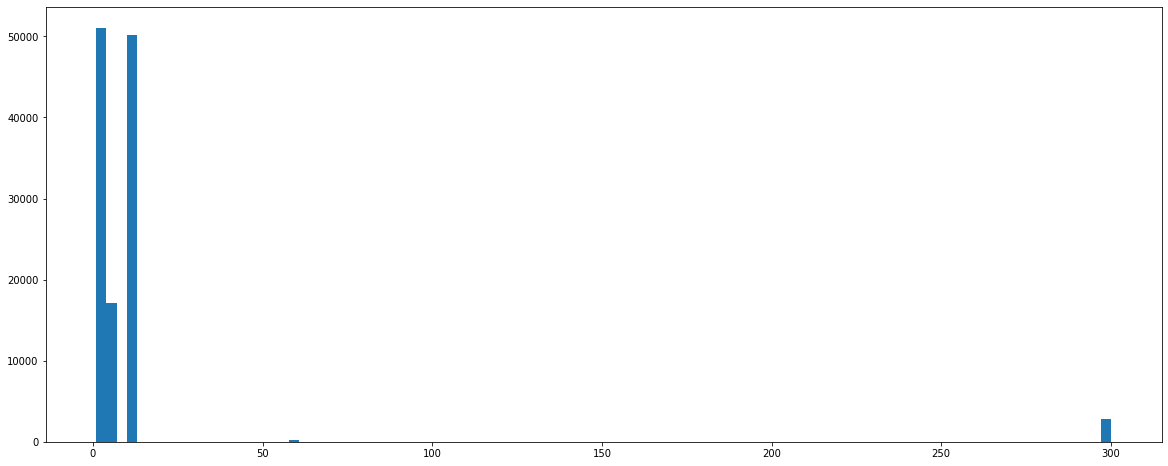

In [28]:
fig = plt.figure(figsize=(20,8))
plt.hist(df['TEMPO_GARANTIA'], bins=100)
plt.show()

Por incrível que pareça, esses valores próximos de 300 não são outliers. Procurei por panelas com 25 anos de garantia e achei alguns anúncios!

Vamos apenas imputar os valores de mediana nos registros faltantes neste caso.

In [70]:
m = 'TEMPO_GARANTIA'
median = df[m].median()

print('NaN em {:s} antes: \t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

for i in df[df[m].isna()].index:
    try:
        df.loc[i, m] = median
    except:
        continue

print('NaN em {:s} depois:\t{:d}\t({:4.2f}%)'.format(m, df[m].isna().sum(), 100 * df[m].isna().sum() / len(df)))

NaN em TEMPO_GARANTIA antes: 	56856	(31.90%)
NaN em TEMPO_GARANTIA depois:	0	(0.00%)


Por fim, temos que completar os valores faltantes em PESO e PRECO. Por serem variáveis contínuas, vale a pena verificar se existe algum tipo de correlação com as outras variáveis contínuas que completamos anteriormente.

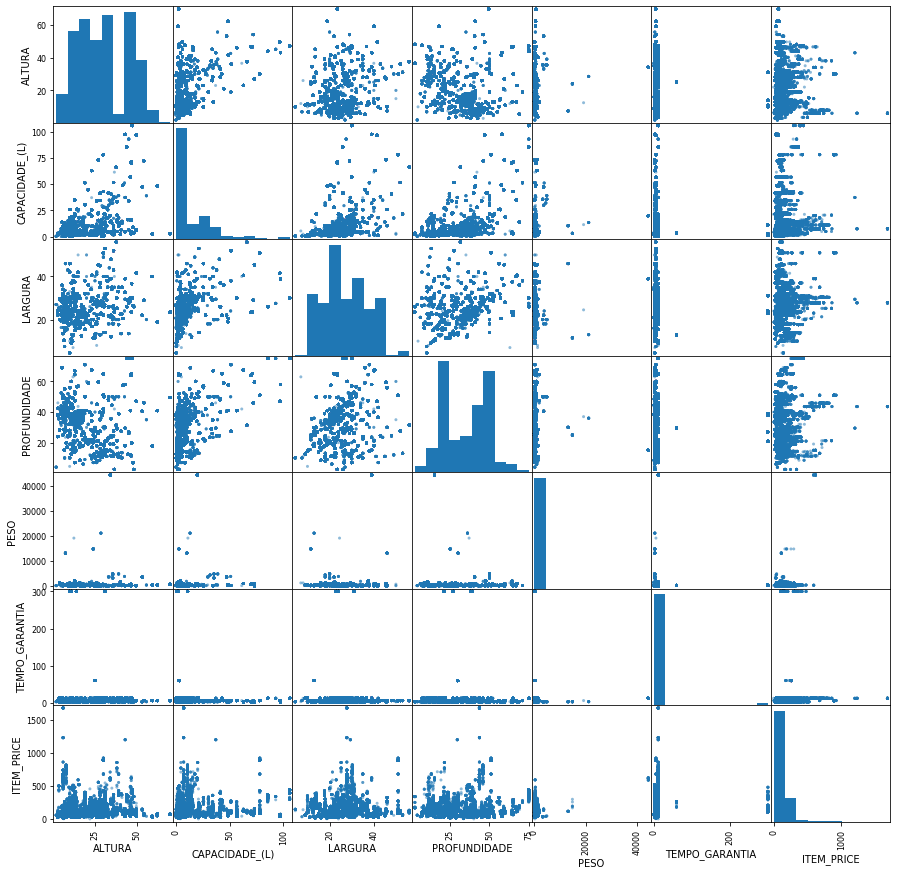

In [30]:
scatter_matrix(df[['ALTURA', 'CAPACIDADE_(L)', 'LARGURA', 'PROFUNDIDADE', 'PESO', 'TEMPO_GARANTIA', 'ITEM_PRICE']], figsize=(15,15))
plt.show()

O histograma do PESO está bem estranho. Vamos verificar mais de perto.

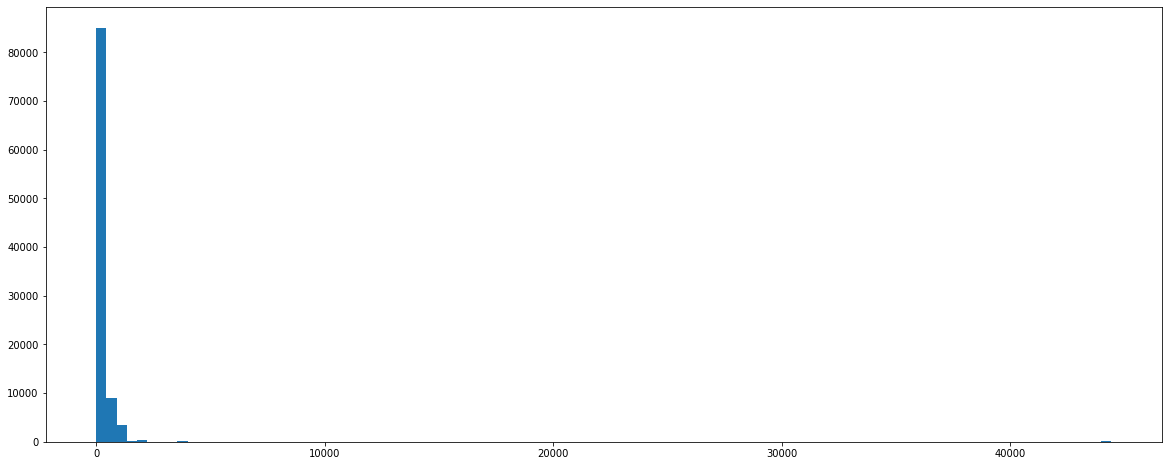

In [31]:
fig = plt.figure(figsize=(20,8))
plt.hist(df['PESO'], bins=100)
plt.show()

Parece existir alguns outliers no PESO. Qual panela pesa mais de 40 toneladas? Apenas as panelas de ferro fundido da CSN, mas este não é o caso aqui. Vamos remover estes outliers.

In [71]:
media = df['PESO'].mean()
stdev = df['PESO'].std()

df = df.loc[(np.abs(df['PESO'] - media) <= 3 * stdev) | df['PESO'].isna()]

Verificar o resultado no histograma

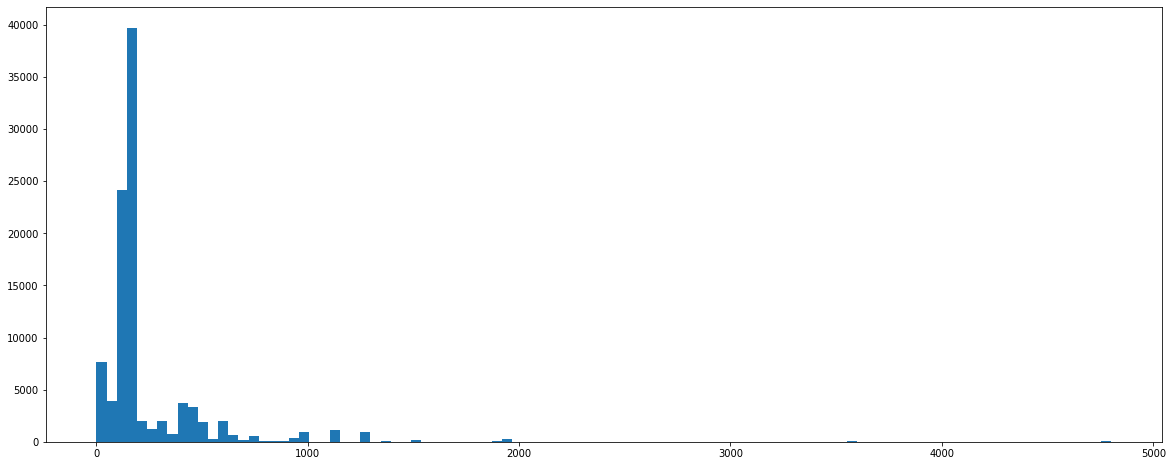

In [33]:
fig = plt.figure(figsize=(20,8))
plt.hist(df['PESO'], bins=100)
plt.show()

Agora vamos treinar uma regressão linear simples para prever os valores do PESO. Vou centrar os valores ao redor da média e escalar pelo desvio padrão com um StandardScaler

R^2 para train set: 0.684
R^2 para test set:  0.697


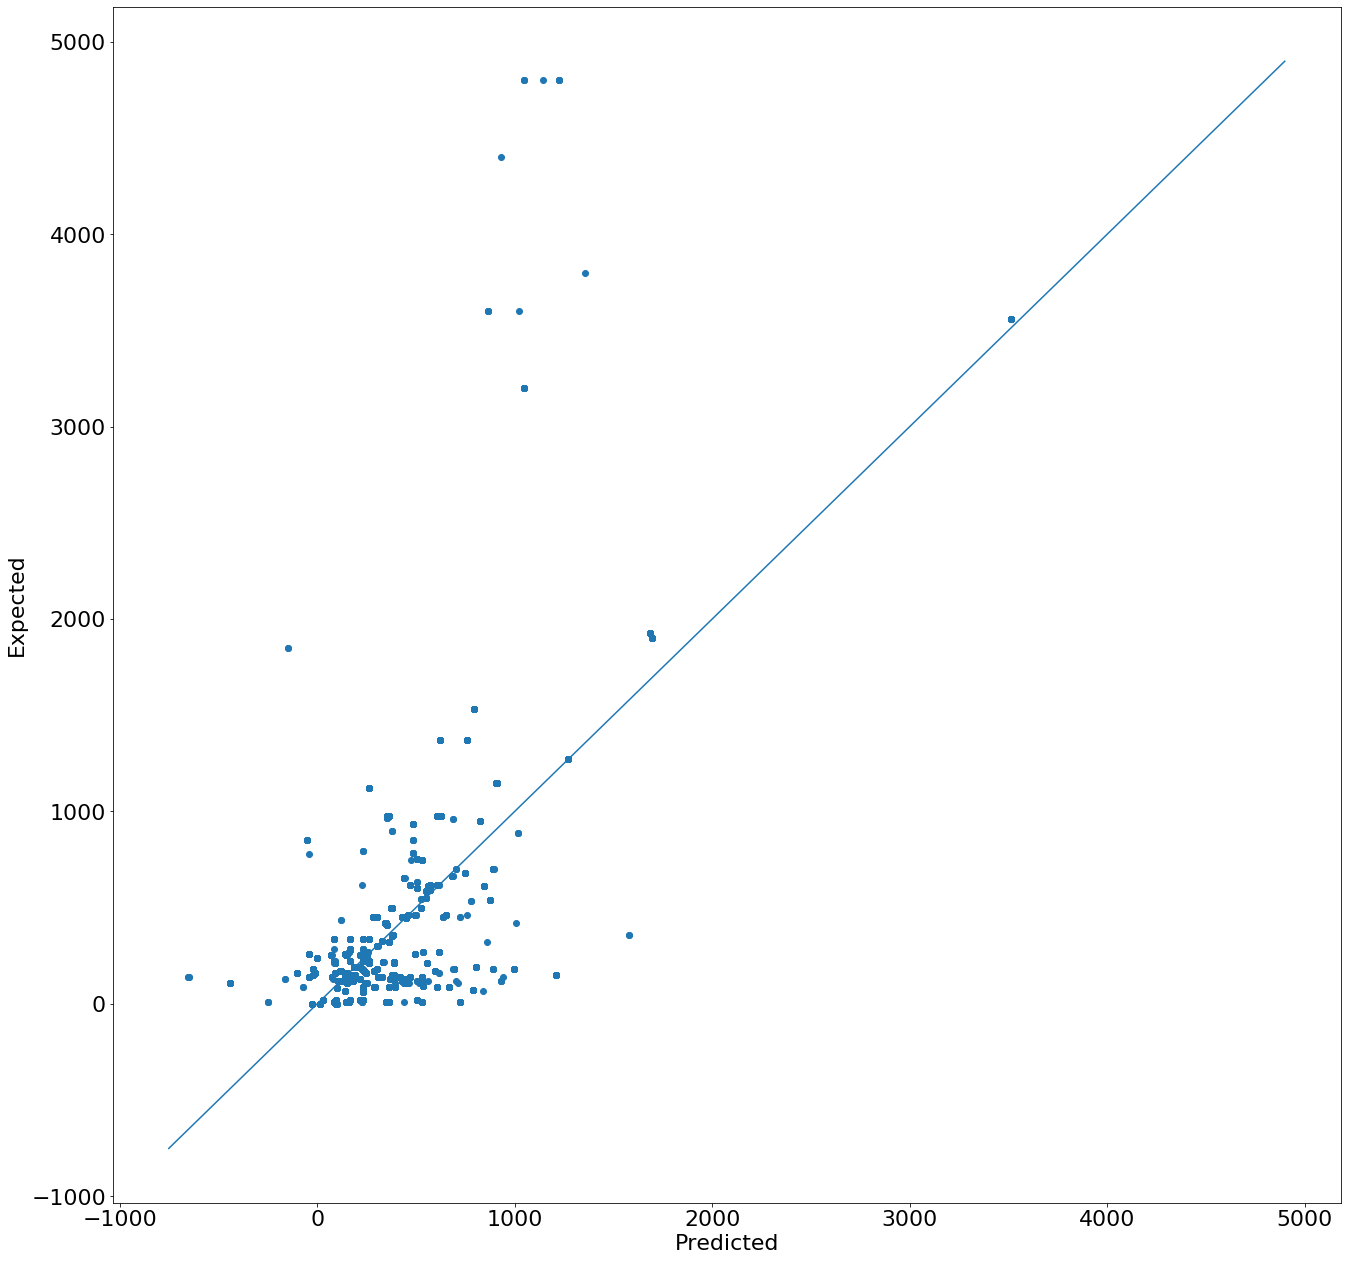

In [72]:
scaler = StandardScaler()

df_train_test = df.loc[df['PESO'].notnull()].drop(['ITEM_PRICE'], axis=1)
# df_predict = df.loc[df['PESO'].isna()].drop(['ITEM_PRICE'], axis=1)

scaler.fit(df_train_test.drop(['PESO'], axis=1))
df_train_test_sc = scaler.transform(df_train_test.drop(['PESO'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(df_train_test_sc, df_train_test['PESO'], test_size=0.25, random_state=0)

# treinar o regressor linear
reg = LinearRegression().fit(X_train,y_train)

# métrica de desempenho é o R^2
print('R^2 para train set: {:5.3f}'.format(reg.score(X_train,y_train)))
print('R^2 para test set:  {:5.3f}'.format(reg.score(X_test,y_test)))

# comparar os valores previstos e esperados no test-set
fig = plt.figure(figsize=(22,22))
y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test)
xi = np.min([np.min(y_pred), np.min(y_test)]) - 100
xf = np.max([np.max(y_pred), np.max(y_test)]) + 100
plt.plot(np.arange(xi, xf), np.arange(xi,xf))

plt.xticks(size=22)
plt.yticks(size=22)

plt.ylabel('Expected', size=22)
plt.xlabel('Predicted', size=22)
plt.show()


Parece que o nosso regressor não funciona muito bem, estamos com baixo R^2 e prevendo pesos negativos! Vamos expandir os features introduzindo algumas operações algébricas e tentar novamente.

In [73]:
df_train_test = df.loc[df['PESO'].notnull()].drop(['ITEM_PRICE'], axis=1)

for i in ['ALTURA', 'CAPACIDADE_(L)', 'LARGURA', 'PROFUNDIDADE', 'TEMPO_GARANTIA']:
    df_train_test[i + '_2'] = df_train_test[i] ** 2
    df_train_test[i + '_3'] = df_train_test[i] ** 3
    df_train_test[i + '_log2'] = df_train_test[i].apply(np.log2)
    df_train_test[i + '_log10'] = df_train_test[i].apply(np.log10)
    df_train_test[i + '_sqrt'] = df_train_test[i].apply(np.sqrt)
    df_train_test[i + '_exp'] = (-df_train_test[i]).apply(np.expm1)

(98293, 150)
149 150
R^2 para train set: 0.784
R^2 para test set:  0.792


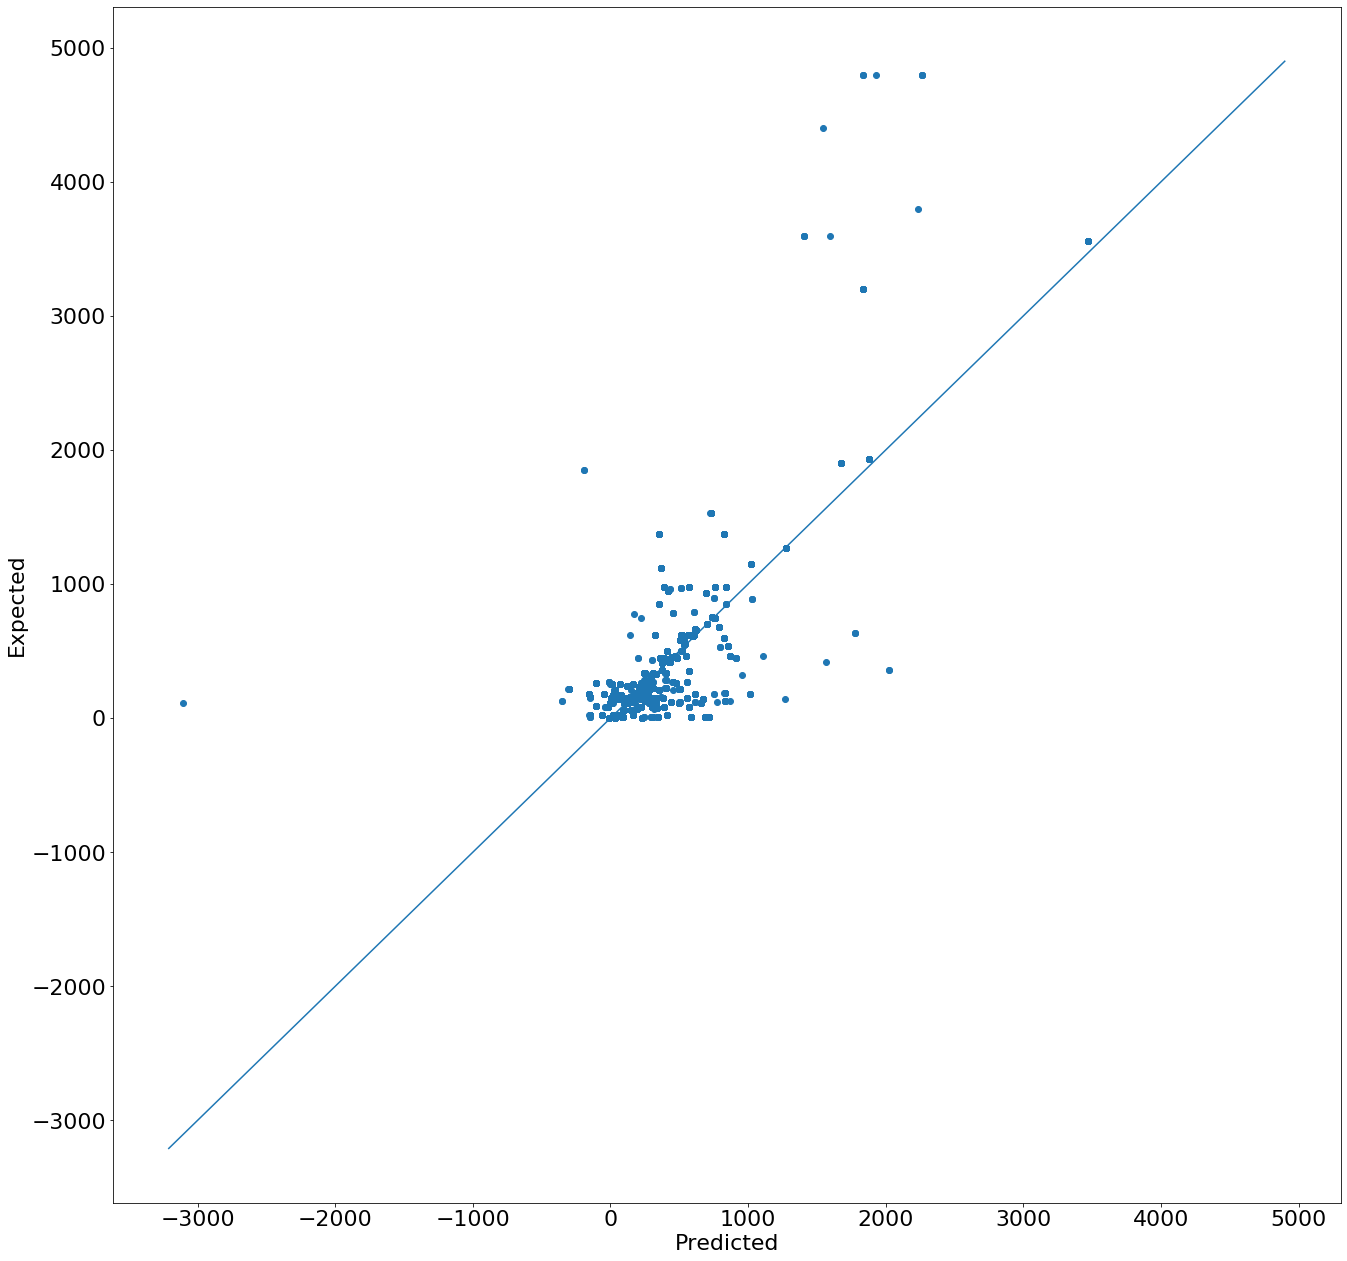

In [74]:
scaler.fit(df_train_test.drop(['PESO'], axis=1))
df_train_test_sc = scaler.transform(df_train_test.drop(['PESO'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(df_train_test_sc, df_train_test['PESO'], test_size=0.25, random_state=0)

# treinar o regressor linear
reg = LinearRegression().fit(X_train,y_train)

# métrica de desempenho é o R^2
print('R^2 para train set: {:5.3f}'.format(reg.score(X_train,y_train)))
print('R^2 para test set:  {:5.3f}'.format(reg.score(X_test,y_test)))

# comparar os valores previstos e esperados no test-set
fig = plt.figure(figsize=(22,22))
y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test)
xi = np.min([np.min(y_pred), np.min(y_test)]) - 100
xf = np.max([np.max(y_pred), np.max(y_test)]) + 100
plt.plot(np.arange(xi, xf), np.arange(xi,xf))

plt.xticks(size=22)
plt.yticks(size=22)

plt.ylabel('Expected', size=22)
plt.xlabel('Predicted', size=22)
plt.show()

Um R^2 de 0.79 já pode ser considerado satisfatório uma vez que estamos apenas usando a regressão para estimar valores do PESO que estão faltando. Vamos usar esse regressor treinado para preencher os valores faltantes.

In [75]:
df_predict = df.loc[df['PESO'].isna()].drop(['ITEM_PRICE', 'PESO'], axis=1)

for i in ['ALTURA', 'CAPACIDADE_(L)', 'LARGURA', 'PROFUNDIDADE', 'TEMPO_GARANTIA']:
    df_predict[i + '_2'] = df_predict[i] ** 2
    df_predict[i + '_3'] = df_predict[i] ** 3
    df_predict[i + '_log2'] = df_predict[i].apply(np.log2)
    df_predict[i + '_log10'] = df_predict[i].apply(np.log10)
    df_predict[i + '_sqrt'] = df_predict[i].apply(np.sqrt)
    df_predict[i + '_exp'] = (-df_predict[i]).apply(np.expm1)

df_predict_sc = scaler.transform(df_predict)

y_pred = reg.predict(df_predict_sc)

print(np.min(y_pred), np.max(y_pred))

-735990023159710.5 2788636760022010.0


Nosso regressor não funcionou bem mesmo após a breve expansão do espaço de features. Voltando ao começo do processo de limpeza dos dados, vemos que a variável peso tem cerca de 45% dos valores faltantes. Acredito que o melhor seja descartar de vez esta coluna...

In [76]:
df = df.drop(['PESO'], axis=1)
print(df.isna().sum().to_string())

ALTURA                                    0
CAPACIDADE_(L)                            0
LARGURA                                   0
PARA_LAVA_LOUCAS                          0
PARA_MICRO_ONDAS                          0
PROFUNDIDADE                              0
TEMPO_GARANTIA                            0
TEM_FERRO_FUNDIDO                         0
TEM_GRELHA                                0
TEM_TAMPA                                 0
TIPO_WOK                                  0
ITEM_PRICE                            12642
INTERESTED                                0
TIPO_PRODUTO_ASSADEIRA                    0
TIPO_PRODUTO_BIFETEIRA                    0
TIPO_PRODUTO_BISTEQUEIRA                  0
TIPO_PRODUTO_BULE                         0
TIPO_PRODUTO_CACAROLA                     0
TIPO_PRODUTO_CALDEIRAO                    0
TIPO_PRODUTO_CANECA/FERVEDOR              0
TIPO_PRODUTO_CANECO                       0
TIPO_PRODUTO_CHALEIRA                     0
TIPO_PRODUTO_CHAPA              

Finalmente, o único valor faltante agora é de registros de ITEM_PRICE. São bem menos registros que no caso de PESO, então vamos tentar fazer uma regressão do mesmo modo e tentar ajustar o ITEM_PRICE através das outras variáveis.

R^2 para train set: 0.771
R^2 para test set:  0.765


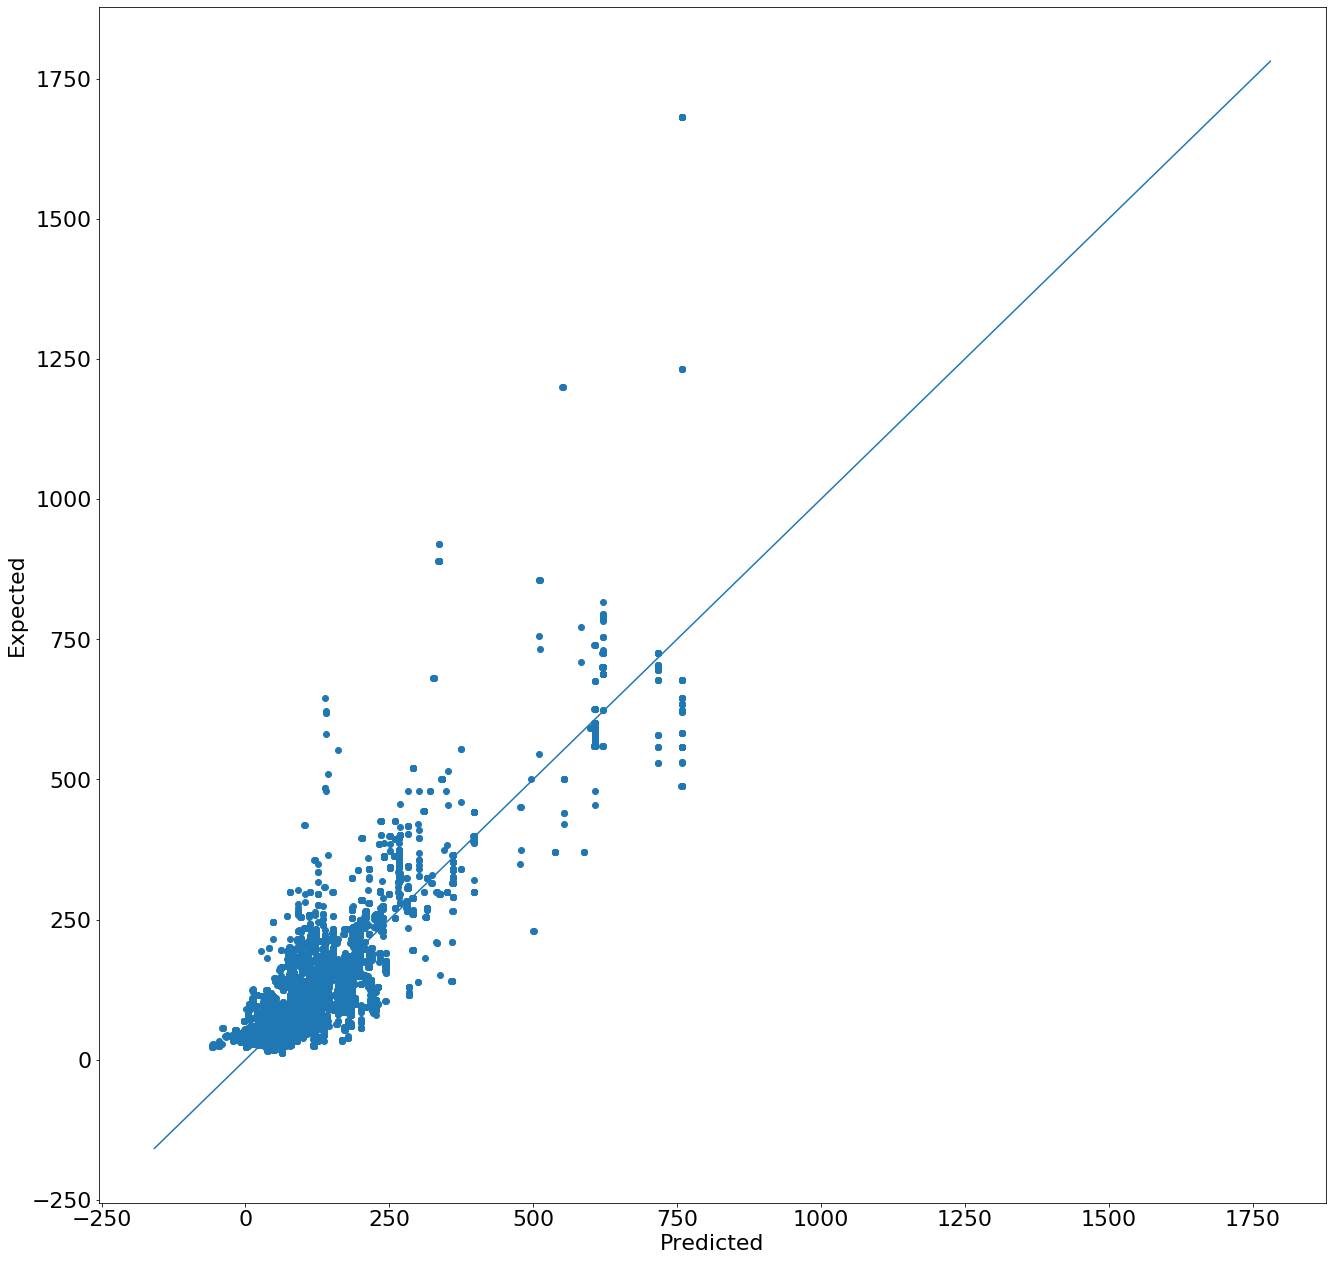

In [77]:
scaler = StandardScaler()

df_train_test = df.loc[df['ITEM_PRICE'].notnull()]
df_predict = df.loc[df['ITEM_PRICE'].isna()].drop(['ITEM_PRICE'], axis=1)

scaler.fit(df_train_test.drop(['ITEM_PRICE'], axis=1))
df_train_test_sc = scaler.transform(df_train_test.drop(['ITEM_PRICE'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(df_train_test_sc, df_train_test['ITEM_PRICE'], test_size=0.25, random_state=0)

# treinar o regressor linear
reg = LinearRegression().fit(X_train,y_train)

# métrica de desempenho é o R^2
print('R^2 para train set: {:5.3f}'.format(reg.score(X_train,y_train)))
print('R^2 para test set:  {:5.3f}'.format(reg.score(X_test,y_test)))

# comparar os valores previstos e esperados no test-set
fig = plt.figure(figsize=(22,22))
y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test)
xi = np.min([np.min(y_pred), np.min(y_test)]) - 100
xf = np.max([np.max(y_pred), np.max(y_test)]) + 100
plt.plot(np.arange(xi, xf), np.arange(xi,xf))

plt.xticks(size=22)
plt.yticks(size=22)

plt.ylabel('Expected', size=22)
plt.xlabel('Predicted', size=22)
plt.show()

Nada mal para uma primeira tentativa! Vamos agora expandir um pouco o feature space como fizemos no caso de PESO.

In [78]:
df_train_test = df.loc[df['ITEM_PRICE'].notnull()]

for i in ['ALTURA', 'CAPACIDADE_(L)', 'LARGURA', 'PROFUNDIDADE', 'TEMPO_GARANTIA']:
    df_train_test[i + '_2'] = df_train_test[i] ** 2
    df_train_test[i + '_3'] = df_train_test[i] ** 3
    df_train_test[i + '_log2'] = df_train_test[i].apply(np.log2)
    df_train_test[i + '_log10'] = df_train_test[i].apply(np.log10)
    df_train_test[i + '_sqrt'] = df_train_test[i].apply(np.sqrt)
    df_train_test[i + '_exp'] = (-df_train_test[i]).apply(np.expm1)

/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

R^2 para train set: 0.809
R^2 para test set:  0.802


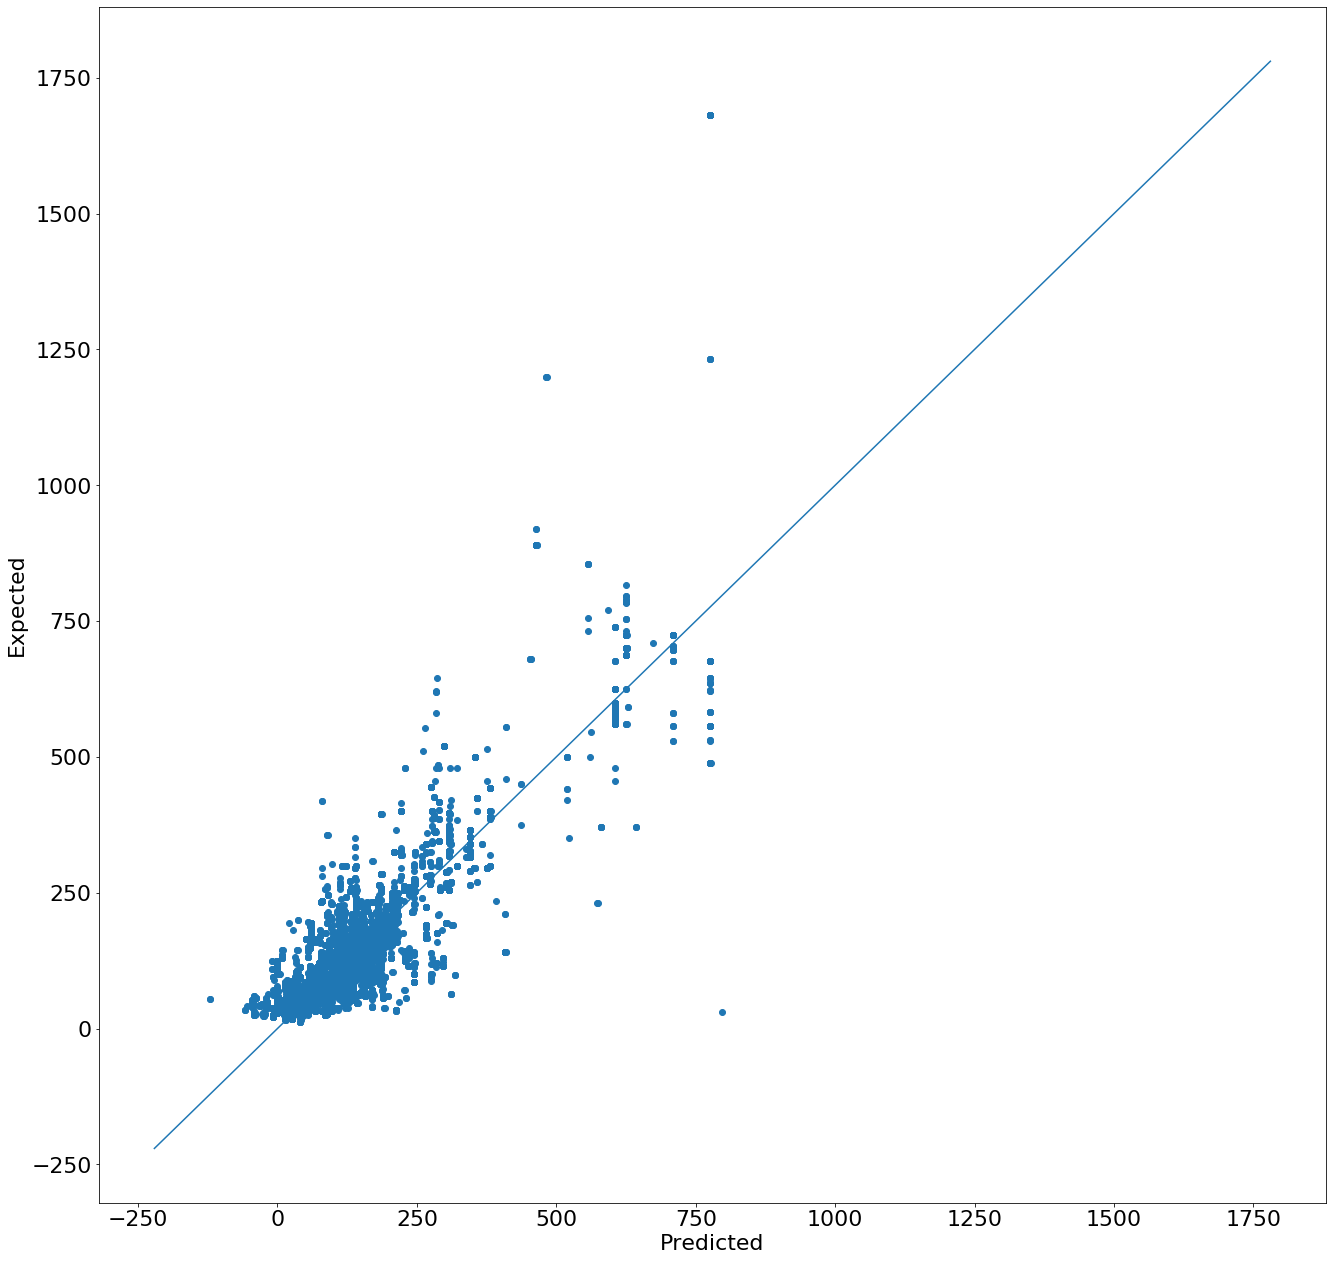

In [79]:
scaler_new = StandardScaler()

scaler_new.fit(df_train_test.drop(['ITEM_PRICE'], axis=1))
df_train_test_sc = scaler_new.transform(df_train_test.drop(['ITEM_PRICE'], axis=1))

# print(np.shape(df_train_test))
# print(len(scaler.mean_), len(df_train_test.columns))
X_train, X_test, y_train, y_test = train_test_split(df_train_test_sc, df_train_test['ITEM_PRICE'], test_size=0.25, random_state=0)

# treinar o regressor linear
reg_new = LinearRegression().fit(X_train,y_train)

# métrica de desempenho é o R^2
print('R^2 para train set: {:5.3f}'.format(reg_new.score(X_train,y_train)))
print('R^2 para test set:  {:5.3f}'.format(reg_new.score(X_test,y_test)))

# comparar os valores previstos e esperados no test-set
fig = plt.figure(figsize=(22,22))
y_pred = reg_new.predict(X_test)
plt.scatter(y_pred, y_test)
xi = np.min([np.min(y_pred), np.min(y_test)]) - 100
xf = np.max([np.max(y_pred), np.max(y_test)]) + 100
plt.plot(np.arange(xi, xf), np.arange(xi,xf))

plt.xticks(size=22)
plt.yticks(size=22)

plt.ylabel('Expected', size=22)
plt.xlabel('Predicted', size=22)
plt.show()

Tivemos uma leve melhora com esta expansão do feature space. Vamos usar este regressor para preencher os valores faltantes de ITEM_PRICE.

In [81]:
df_predict = df.loc[df['ITEM_PRICE'].isna()].drop(['ITEM_PRICE'], axis=1)

for i in ['ALTURA', 'CAPACIDADE_(L)', 'LARGURA', 'PROFUNDIDADE', 'TEMPO_GARANTIA']:
    df_predict[i + '_2'] = df_predict[i] ** 2
    df_predict[i + '_3'] = df_predict[i] ** 3
    df_predict[i + '_log2'] = df_predict[i].apply(np.log2)
    df_predict[i + '_log10'] = df_predict[i].apply(np.log10)
    df_predict[i + '_sqrt'] = df_predict[i].apply(np.sqrt)
    df_predict[i + '_exp'] = (-df_predict[i]).apply(np.expm1)

df_predict_sc = scaler_new.transform(df_predict)

y_pred = reg_new.predict(df_predict_sc)

print('ITEM_PRICE negativos: {:d} ({:4.2f}%)'.format(np.sum(y_pred < 0), np.sum(y_pred < 0)*100/len(y_pred)))

media = df['ITEM_PRICE'].mean()
stdev = df['ITEM_PRICE'].std()

print('ITEM_PRICE outliers (3 sigma): {:d} ({:4.2f}%)'.format(np.sum(np.abs(y_pred - media) > 3 * stdev), np.sum(np.abs(y_pred - media) > 3 * stdev)*100/len(y_pred)))
# df = df.loc[(np.abs(df['PESO'] - media) <= 3 * stdev) | df['PESO'].isna()]

ITEM_PRICE negativos: 473 (3.74%)
ITEM_PRICE outliers (3 sigma): 762 (6.03%)


parece que os valores preditos não estão ruins. Poucos valores sem sentido. Vamos introduzi-los novamente no dataframe original e remover estes valores estranhos.

In [82]:
# as labels são levadas de volta ao dataframe original, substituindo os NaNs
for i, j in enumerate(df_predict.index):
    df.loc[j, 'ITEM_PRICE'] = y_pred[i]

# remover valores negativos e outliers
media = df['ITEM_PRICE'].mean()
stdev = df['ITEM_PRICE'].std()

df = df.loc[(np.abs(df['ITEM_PRICE'] - media) <= 3 * stdev) & (df['ITEM_PRICE'] > 0)]

Verificação final para NaNs...

In [83]:
print(df.isna().sum().to_string())

ALTURA                                0
CAPACIDADE_(L)                        0
LARGURA                               0
PARA_LAVA_LOUCAS                      0
PARA_MICRO_ONDAS                      0
PROFUNDIDADE                          0
TEMPO_GARANTIA                        0
TEM_FERRO_FUNDIDO                     0
TEM_GRELHA                            0
TEM_TAMPA                             0
TIPO_WOK                              0
ITEM_PRICE                            0
INTERESTED                            0
TIPO_PRODUTO_ASSADEIRA                0
TIPO_PRODUTO_BIFETEIRA                0
TIPO_PRODUTO_BISTEQUEIRA              0
TIPO_PRODUTO_BULE                     0
TIPO_PRODUTO_CACAROLA                 0
TIPO_PRODUTO_CALDEIRAO                0
TIPO_PRODUTO_CANECA/FERVEDOR          0
TIPO_PRODUTO_CANECO                   0
TIPO_PRODUTO_CHALEIRA                 0
TIPO_PRODUTO_CHAPA                    0
TIPO_PRODUTO_COZI-PASTA               0
TIPO_PRODUTO_COZI-VAPORE              0


In [84]:
print(len(df))

177358


Ainda mantivemos uma quantidade considerável de registros!

Agora podemos seguir para a classificação por interesse do usuário.

In [46]:
df.dtypes

ALTURA               float64
CAPACIDADE_(L)       float64
LARGURA              float64
PARA_LAVA_LOUCAS    category
PARA_MICRO_ONDAS    category
                      ...   
COR_ROXO               uint8
COR_TURQUESA           uint8
COR_VERDE              uint8
COR_VERMELHO           uint8
COR_VINHO              uint8
Length: 120, dtype: object

Temos 119 parâmetros para treinar, podemos usar alguns algoritmos e comparar.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('INTERESTED', axis=1), df['INTERESTED'], test_size=0.25, random_state=0)

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

print('Score train set: {:6.2f}%'.format(clf.score(X_train, y_train)*100))
print('Score test set: {:6.2f}%'.format(clf.score(X_test, y_test)*100))

/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score train set:  91.35%
Score test set:  91.21%


Nada mal! Podemos brincar com parâmetro de regularização na regressão logística...

In [48]:
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(X_train, y_train)

print("Sem regularizacao")
print('Score train set: {:6.2f}%'.format(clf.score(X_train, y_train)*100))
print('Score test set: {:6.2f}%'.format(clf.score(X_test, y_test)*100))

clf = LogisticRegression(random_state=0, solver='saga', penalty='l1').fit(X_train, y_train)

print("Regularizacao L1")
print('Score train set: {:6.2f}%'.format(clf.score(X_train, y_train)*100))
print('Score test set: {:6.2f}%'.format(clf.score(X_test, y_test)*100))

Sem regularizacao
Score train set:  91.42%
Score test set:  91.14%


/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Regularizacao L1
Score train set:  91.30%
Score test set:  91.02%


A L1 nao permite usar BFGS como minimizador... Tentei liblinear (demorou muito e não convergiu) e saga (não conheço os detalhes, mas demorou menos e não convergiu). Parece que a logistic regression já fez um trabalho legal, mas vamos tentar outra coisa, Support Vector Classifier por exemplo.

In [87]:
clf = SVC(gamma='auto', kernel='linear', max_iter=1e5, verbose=True)

clf.fit(X_train, y_train)

# print("Radial Basis Function (gaussian) kernel")
print("Linear kernel")
print('Score train set: {:6.2f}%'.format(clf.score(X_train, y_train)*100))
print('Score test set: {:6.2f}%'.format(clf.score(X_test, y_test)*100))

[LibSVM]

/home/claudio/anaconda3/envs/data/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Linear kernel
Score train set:  25.98%
Score test set:  26.15%


Não pareceu uma boa ideia, a convergência foi bem ruim e o score é pior que simplesmente chutar um valor de itneresse para todos os exemplos! Talvez com um computador melhor seja factível usar um SVC...

In [91]:
clf = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=0)
clf.fit(X_train, y_train)
print("Random Forest")
print('Score train set: {:6.2f}%'.format(clf.score(X_train, y_train)*100))
print('Score test set: {:6.2f}%'.format(clf.score(X_test, y_test)*100))

Random Forest
Score train set:  91.35%
Score test set:  91.21%


O classificador Random Forest é tão bom quanto o logistic regression. Fiz alguns testes com o numero de estimadores e max_depth e não mudou muita coisa...

A grande vantangem deste classificador é que ele fornece uma explicação sobre a importância de cada feature no algormitmo. Vamos visualizar essa informação.

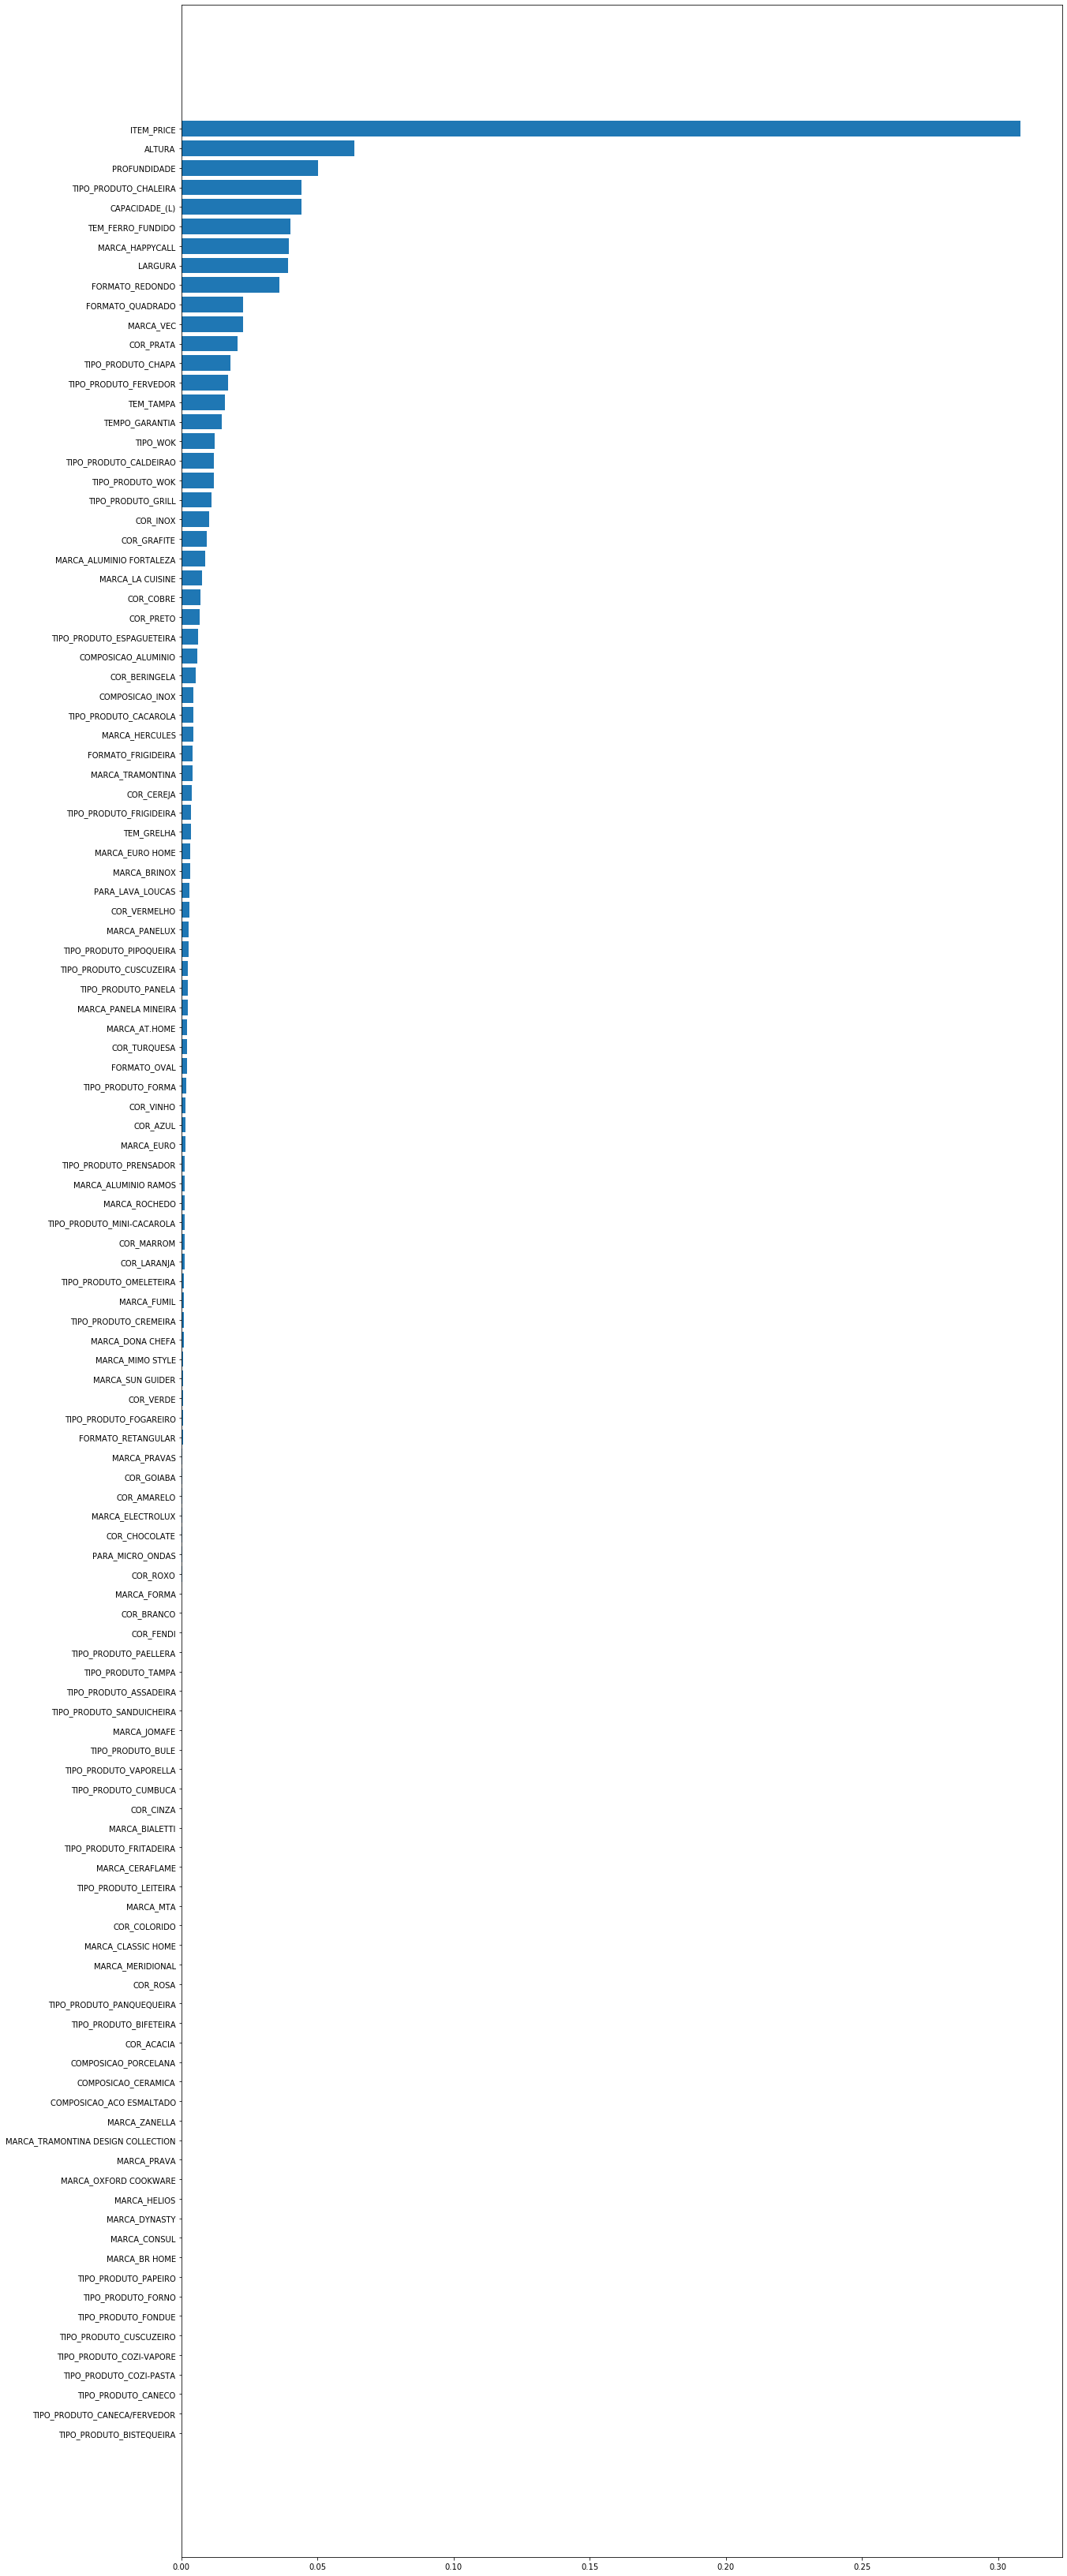

In [113]:
d = [[df.drop('INTERESTED', axis=1).columns[i], clf.feature_importances_[i]] for i in range(len(clf.feature_importances_))]
d = sorted(d, key = lambda x : x[1]) #, reverse=True)

feat = [i[1] for i in d]
labl = [i[0] for i in d]

# print(feat)
# print(labl)

fig, ax = plt.subplots(figsize=(20,0.5*len(d)))

ax.barh(np.arange(len(feat)), feat, tick_label=labl) #, orientation='horizontal')
# plt.yticks(labl)
plt.show()
# for i in d:
#     print(i)
#     print('Feature: {:s}, Importancia: {:6.4f}%'.format(i[0], i[1]))